# Proyecto: Efecto de las políticas educativas en el número de denuncias hacia las instituciones educativas del país
**Equipo N° 20:**
* Martín Fuentealba 21314147-4
* Javiera Marty 21183098-0
* Naomi Tene 21036679-2


## Introducción
El presente proyecto busca predecir el número de denuncias futuras en los colegios y analizar si las sanciones históricas han tenido un impacto significativo en la reducción de estas, o en el aumento.

**Objetivos:**
- Aplicación de un modelo de machine learning.
- Creación del coeficiente de correlación Punto-Biserial.

## Metodología
Para resolver el problema, se siguieron los siguientes pasos:
1. [Explicación de los métodos usados]
2. [Resumen de análisis y técnicas]


# Base de datos

Contamos con un total de 3 bases de datos distintas, una contiene las denuncias que han recivido los colegios a lo largo de los años (2013-2024), la segunda base de datos presenta la información de los las sanciones aplicadas a los colegios entre los años 2014 a 2023. Finalmente la ultima base de datos es una lista de los colegios existentes y caracteristicas de los mismos.  

## Unificación de las Bases de Datos

En esta sección, se unificaran las bases de datos para trabajar con ellas como una sola gran base.

In [ ]:
# Importar biblioteca
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive

drive.mount('/content/drive')

df_denuncias = pd.read_excel('/content/drive/My Drive/2024/Data science/Proyecto/Denuncias_procesado.xlsx')
df_sanciones = pd.read_excel('/content/drive/My Drive/2024/Data science/Proyecto/Sanciones.xlsx')


df_denuncias = df_denuncias[df_denuncias['AGNO'] > 2015]
df_denuncias = df_denuncias.rename(columns={'RBD': 'EE_RBD'})

print(df_denuncias.head())
print(df_sanciones.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       AGNO            DEN_ID  DEN_CANAL  DEN_ESTADO  DEN_FEC_CREACION  \
22217  2016  CAS-50570-L5N4S7          2           1          20160102   
22218  2016  CAS-50573-V2D2C0          2           1          20160102   
22219  2016  CAS-50574-Q7T1Q7          2           1          20160103   
22220  2016  CAS-50575-N1S0H4          2           1          20160103   
22221  2016  CAS-50576-S5Y0F6          2           1          20160103   

       DEN_MES_CREACION  DEN_TRIMESTRE_CREACION DEN_FEC_TERMINO_DENUNCIA  \
22217                 1                       1                 20160208   
22218                 1                       1                 20160317   
22219                 1                       1                 20160105   
22220                 1                       1                 20160104   
22221                 1                       

In [ ]:
drive.mount('/content/drive')
df_colegios = pd.read_excel('/content/drive/My Drive/2024/Data science/Proyecto/Data colegios.xlsx')

print(df_colegios)
df_colegios = df_colegios.rename(columns={'RBD': 'EE_RBD'})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        AGNO    RBD  DGV_RBD                                        NOM_RBD  \
0       2023      1        9                        LICEO POLITECNICO ARICA   
1       2023      2        7                      PARVULARIO LAS ESPIGUITAS   
2       2023      3        5            ESC. PEDRO VICENTE GUTIERREZ TORRES   
3       2023      4        3                      LICEO OCTAVIO PALMA PEREZ   
4       2023      5        1                       JOVINA NARANJO FERNANDEZ   
...      ...    ...      ...                                            ...   
130445  2016  40454        3  ESCUELA ESPECIAL DE LENGUAJE MI GATITO MARTIN   
130446  2016  40455        1                      COLEGIO PATAGONIA INSULAR   
130447  2016  40457        8         LICEO TECNICO PROFESIONAL PABLO NERUDA   
130448  2016  40458        6         ESCUELA DE LENGUAJE MOMENTOS PRECIOSOS   
13

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print(df_denuncias.columns)



df_denuncia = df_denuncias.groupby(['AGNO', 'EE_RBD']).size().reset_index(name='Cantidad_Denuncias')

print(df_denuncia.head())


df_combi = pd.merge(df_colegios, df_denuncia, on=['AGNO', 'EE_RBD'], how='left')
df_combi = df_combi.fillna(0)
print(df_combi.head())

nombre_archivo = 'Denuncia_datos_colegiods.xlsx'


columnas_a_eliminar = [
    'MRUN', 'RUT_SOSTENEDOR', 'MRUN', 'DGV_RBD',
    'P_JURIDICA', 'NOM_REG_RBD_A', 'COD_COM_RBD', 'COD_DEPROV_RBD', 'COD_DEPE',
    'LATITUD', 'LONGITUD', 'PACE', 'ENS_01', 'ENS_02', 'ENS_03', 'ENS_04', 'ENS_05',
    'ENS_06', 'ENS_07' , 'ENS_08', 'ENS_09', 'ENS_10', 'ENS_11', 'MATRICULA', 'ORI_OTRO_GLOSA'
]

df_combi = df_combi.drop(columns=columnas_a_eliminar)



promedio_2022_2023 = df_combi[df_combi['AGNO'].isin([2022, 2023])]['MAT_TOTAL'].mean()

df_combi['MAT_TOTAL'] = df_combi['MAT_TOTAL'].fillna(promedio_2022_2023)


print(df_combi.head())



df_combi.to_excel(nombre_archivo, index=False)  # `index=False` para no guardar el índice

print(f"Archivo Excel '{nombre_archivo}' creado con éxito.")

Index(['AGNO', 'DEN_ID', 'DEN_CANAL', 'DEN_ESTADO', 'DEN_FEC_CREACION',
       'DEN_MES_CREACION', 'DEN_TRIMESTRE_CREACION',
       'DEN_FEC_TERMINO_DENUNCIA', 'DEN_OFICINA', 'DEN_DEPARTAMENTO',
       'DEN_AMBITO', 'DEN_TEMA', 'DEN_SUBTEMA', 'DEN_MRUN', 'DEN_AFECTADO',
       'DEN_GENERO', 'DEN_SEXO', 'DEN_TIPO', 'AFEC_MRUN', 'AFEC_GENERO',
       'AFEC_SEXO', 'AFEC_TIPO', 'EE_RBD', 'EE_NOMBRE', 'EE_COD_REGION',
       'EE_COD_PROVINCIA', 'EE_COD_COMUNA', 'EE_NOM_COMUNA', 'EE_COD_DEPE',
       'EE_DEPE_AGRUP', 'AFEC_COD_ENSE2', 'DEN_REGION', 'DEN_CIBERBULLYING'],
      dtype='object')
   AGNO EE_RBD  Cantidad_Denuncias
0  2016      1                   7
1  2016      4                   5
2  2016      5                   8
3  2016      7                   3
4  2016      8                   8


<ipython-input-23-2ef583e75932>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combi = df_combi.fillna(0)


   AGNO  EE_RBD  DGV_RBD                              NOM_RBD MRUN  \
0  2023       1        9              LICEO POLITECNICO ARICA        
1  2023       2        7            PARVULARIO LAS ESPIGUITAS        
2  2023       3        5  ESC. PEDRO VICENTE GUTIERREZ TORRES        
3  2023       4        3            LICEO OCTAVIO PALMA PEREZ        
4  2023       5        1             JOVINA NARANJO FERNANDEZ        

  RUT_SOSTENEDOR  P_JURIDICA  COD_REG_RBD NOM_REG_RBD_A  COD_PRO_RBD  ...  \
0       62000660           1           15           AYP          151  ...   
1       62000660           1           15           AYP          151  ...   
2       62000660           1           15           AYP          151  ...   
3       62000660           1           15           AYP          151  ...   
4       62000660           1           15           AYP          151  ...   

   ENS_10 ENS_11  MAT_TOTAL MATRICULA  ESTADO_ESTAB  ORI_RELIGIOSA  \
0     0.0    0.0      787.0         1         

In [ ]:
df_denuncia = df_denuncias.groupby(['AGNO', 'EE_RBD']).agg(
    Cantidad_Denuncias=('EE_RBD', 'count'),
    EE_COD_REGION=('EE_COD_REGION', 'first'),
    EE_COD_COMUNA=('EE_COD_COMUNA', 'first'),)

print(df_denuncia.head())

nombre_archivo = 'Denuncia_Agrupadas.xlsx'

df_denuncia.to_excel(nombre_archivo, index=False)

print(f"Archivo Excel '{nombre_archivo}' creado con éxito.")


             Cantidad_Denuncias EE_COD_REGION EE_COD_COMUNA
AGNO EE_RBD                                                
2016 1                        7            15         15101
     4                        5            15         15101
     5                        8            15         15101
     7                        3            15         15101
     8                        8            15         15101
Archivo Excel 'Denuncia_Agrupadas.xlsx' creado con éxito.


In [ ]:
df_sanciones.fillna(0, inplace=True)

for column in df_sanciones.filter(like='PRIVACION').columns:
    df_sanciones[column] = pd.to_numeric(df_sanciones[column], errors='coerce')

df_sanciones['PRIVACION_TOTAL'] = df_sanciones.filter(like='PRIVACION').sum(axis=1)
df_sanciones['AMONESTACION_TOTAL'] = df_sanciones.filter(like='AMONESTACION').sum(axis=1)
df_sanciones['MULTA_TOTAL'] = df_sanciones.filter(like='MULTA').sum(axis=1)
df_sanciones['INHABILIDAD_TOTAL'] = df_sanciones.filter(like='INHABILIDAD').sum(axis=1)
df_sanciones['REINTEGRO_TOTAL'] = df_sanciones.filter(like='REINTEGRO').sum(axis=1)
df_sanciones['REVOCACION_TOTAL'] = df_sanciones.filter(like='REVOCACION').sum(axis=1)
df_sanciones['SOBRESEIDO_TOTAL'] = df_sanciones.filter(like='SOBRESEIDO').sum(axis=1)
df_sanciones['SUSP_SUBV_TOTAL'] = df_sanciones.filter(like='SUSP_SUBV').sum(axis=1)

df_sanciones_reducido = df_sanciones[['AGNO_TERMINO', 'EE_RBD', 'EE_COD_DEPE',
                                      'AMONESTACION_TOTAL', 'MULTA_TOTAL', 'INHABILIDAD_TOTAL',
                                      'PRIVACION_TOTAL', 'REINTEGRO_TOTAL', 'REVOCACION_TOTAL',
                                      'SOBRESEIDO_TOTAL', 'SUSP_SUBV_TOTAL']]

df_sancion = df_sanciones_reducido.groupby(['AGNO_TERMINO', 'EE_RBD'], as_index=False).sum()



df_sancion['sancion'] = df_sancion[['AMONESTACION_TOTAL', 'INHABILIDAD_TOTAL', 'PRIVACION_TOTAL',
                            'REINTEGRO_TOTAL', 'REVOCACION_TOTAL', 'SOBRESEIDO_TOTAL', 'SUSP_SUBV_TOTAL']].any(axis=1).astype(int)

nombre_archivo = 'Sanciones_Agrupadas.xlsx'

df_sancion.to_excel(nombre_archivo, index=False)

print(df_sancion.head())
nombre_archivo = '1.xlsx'
print(df_sancion.dtypes)
df_sancion.to_excel(nombre_archivo, index=False)



   AGNO_TERMINO EE_RBD                                        EE_COD_DEPE  \
0          2016      4                           MINEDUC - Municipal DAEM   
1          2016      7                           MINEDUC - Municipal DAEM   
2          2016      9  MINEDUC - Municipal DAEMMINEDUC - Municipal DA...   
3          2016     13                           MINEDUC - Municipal DAEM   
4          2016     14                           MINEDUC - Municipal DAEM   

   AMONESTACION_TOTAL  MULTA_TOTAL  INHABILIDAD_TOTAL  PRIVACION_TOTAL  \
0                   0          0.0                  0              0.0   
1                   1          0.0                  0              0.0   
2                   2        203.0                  0              0.0   
3                   1          0.0                  0              0.0   
4                   0          0.0                  0              0.0   

   REINTEGRO_TOTAL  REVOCACION_TOTAL  SOBRESEIDO_TOTAL  SUSP_SUBV_TOTAL  \
0              0.

In [ ]:
df_sancion.rename(columns={'AGNO_TERMINO': 'AGNO'}, inplace=True)

In [ ]:
df_cruzado = pd.merge(df_combi, df_sancion, on=['EE_RBD', 'AGNO'], how='left')
columnas_a_rellenar = ['AMONESTACION_TOTAL', 'MULTA_TOTAL',
    'INHABILIDAD_TOTAL', 'PRIVACION_TOTAL', 'REINTEGRO_TOTAL',
    'REVOCACION_TOTAL', 'SOBRESEIDO_TOTAL', 'SUSP_SUBV_TOTAL',
'sancion']
df_cruzado[columnas_a_rellenar] = df_cruzado[columnas_a_rellenar].fillna(0)

nombre_archivo = 'FINAL.xlsx'

print(df_cruzado.head())

df_cruzado.to_excel(nombre_archivo, index=False)

   AGNO EE_RBD                              NOM_RBD  COD_REG_RBD  COD_PRO_RBD  \
0  2023      1              LICEO POLITECNICO ARICA           15          151   
1  2023      2            PARVULARIO LAS ESPIGUITAS           15          151   
2  2023      3  ESC. PEDRO VICENTE GUTIERREZ TORRES           15          151   
3  2023      4            LICEO OCTAVIO PALMA PEREZ           15          151   
4  2023      5             JOVINA NARANJO FERNANDEZ           15          151   

  NOM_COM_RBD NOM_DEPROV_RBD  COD_DEPE2  RURAL_RBD  CONVENIO_PIE  ...  \
0       ARICA          ARICA          5          0             1  ...   
1       ARICA          ARICA          5          0             1  ...   
2       ARICA          ARICA          5          1             0  ...   
3       ARICA          ARICA          5          0             1  ...   
4       ARICA          ARICA          5          0             1  ...   

                                        EE_COD_DEPE  AMONESTACION_TOTAL  \

In [ ]:
# Importar bibliotecas necesarias
from sklearn.preprocessing import LabelEncoder

price_mapping = {
    "SIN INFORMACION": 0,
    "GRATUITO": 1,
    "$1.000 A $10.000": 2,
    "$10.001 A $25.000": 3,
    "$25.001 A $50.000": 4,
    "$50.001 A $100.000": 5,
    "MAS DE $100.000": 6
}

data=df_cruzado.copy()
data['PAGO_MATRICULA'] = df_cruzado['PAGO_MATRICULA'].map(price_mapping)
data['PAGO_MENSUAL'] = df_cruzado['PAGO_MENSUAL'].map(price_mapping)

print(data[['PAGO_MATRICULA', 'PAGO_MENSUAL']].head())

print(data)

nombre_archivo = 'FINAL_ENCODED.xlsx'

data.to_excel(nombre_archivo, index=False)

   PAGO_MATRICULA  PAGO_MENSUAL
0               1             1
1               1             1
2               1             1
3               1             1
4               1             1
        AGNO EE_RBD                                        NOM_RBD  \
0       2023      1                        LICEO POLITECNICO ARICA   
1       2023      2                      PARVULARIO LAS ESPIGUITAS   
2       2023      3            ESC. PEDRO VICENTE GUTIERREZ TORRES   
3       2023      4                      LICEO OCTAVIO PALMA PEREZ   
4       2023      5                       JOVINA NARANJO FERNANDEZ   
...      ...    ...                                            ...   
130445  2016  40454  ESCUELA ESPECIAL DE LENGUAJE MI GATITO MARTIN   
130446  2016  40455                      COLEGIO PATAGONIA INSULAR   
130447  2016  40457         LICEO TECNICO PROFESIONAL PABLO NERUDA   
130448  2016  40458         ESCUELA DE LENGUAJE MOMENTOS PRECIOSOS   
130449  2016  40459                   

## Análisis Exploratorio de Datos (EDA)

En esta sección, se examinaran las características principales de los datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_data = pd.read_excel('/content/drive/My Drive/2024/Data science/Proyecto/FINAL.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Primeros 5 registros del dataset:")
print(data.head())

Primeros 5 registros del dataset:
   AGNO EE_RBD                              NOM_RBD  COD_REG_RBD  COD_PRO_RBD  \
0  2023      1              LICEO POLITECNICO ARICA           15          151   
1  2023      2            PARVULARIO LAS ESPIGUITAS           15          151   
2  2023      3  ESC. PEDRO VICENTE GUTIERREZ TORRES           15          151   
3  2023      4            LICEO OCTAVIO PALMA PEREZ           15          151   
4  2023      5             JOVINA NARANJO FERNANDEZ           15          151   

  NOM_COM_RBD NOM_DEPROV_RBD  COD_DEPE2  RURAL_RBD  CONVENIO_PIE  ...  \
0       ARICA          ARICA          5          0             1  ...   
1       ARICA          ARICA          5          0             1  ...   
2       ARICA          ARICA          5          1             0  ...   
3       ARICA          ARICA          5          0             1  ...   
4       ARICA          ARICA          5          0             1  ...   

                                        

In [ ]:
print("\nInformación general del dataset:")
print(df_data.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130450 entries, 0 to 130449
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AGNO                130450 non-null  int64  
 1   EE_RBD              130450 non-null  int64  
 2   NOM_RBD             130450 non-null  object 
 3   COD_REG_RBD         130450 non-null  int64  
 4   COD_PRO_RBD         130450 non-null  int64  
 5   NOM_COM_RBD         130450 non-null  object 
 6   NOM_DEPROV_RBD      130450 non-null  object 
 7   COD_DEPE2           130450 non-null  int64  
 8   RURAL_RBD           130450 non-null  int64  
 9   CONVENIO_PIE        130450 non-null  int64  
 10  MAT_TOTAL           130450 non-null  int64  
 11  ESTADO_ESTAB        130450 non-null  int64  
 12  ORI_RELIGIOSA       130450 non-null  int64  
 13  PAGO_MATRICULA      130450 non-null  int64  
 14  PAGO_MENSUAL        130450 non-null  int64  
 15  

In [ ]:
print("\nResumen estadístico del dataset:")
print(df_data.describe(include="all"))


Resumen estadístico del dataset:
                 AGNO         EE_RBD   NOM_RBD    COD_REG_RBD    COD_PRO_RBD  \
count   130450.000000  130450.000000  130450.0  130450.000000  130450.000000   
unique            NaN            NaN   17921.0            NaN            NaN   
top               NaN            NaN       0.0            NaN            NaN   
freq              NaN            NaN     240.0            NaN            NaN   
mean      2019.534849   12880.500245       NaN       9.121127      93.257470   
std          2.291654    9991.769705       NaN       3.719293      36.876076   
min       2016.000000       1.000000       NaN       1.000000      11.000000   
25%       2018.000000    4915.000000       NaN       6.000000      61.000000   
50%       2020.000000   10202.000000       NaN       9.000000      91.000000   
75%       2022.000000   20041.000000       NaN      13.000000     131.000000   
max       2023.000000   42200.000000       NaN      16.000000     163.000000   

     

In [ ]:
print("\nDatos faltantes por columna:")
print(df_data.isnull().sum())


Datos faltantes por columna:
AGNO                  0
EE_RBD                0
NOM_RBD               0
COD_REG_RBD           0
COD_PRO_RBD           0
NOM_COM_RBD           0
NOM_DEPROV_RBD        0
COD_DEPE2             0
RURAL_RBD             0
CONVENIO_PIE          0
MAT_TOTAL             0
ESTADO_ESTAB          0
ORI_RELIGIOSA         0
PAGO_MATRICULA        0
PAGO_MENSUAL          0
Cantidad_Denuncias    0
AMONESTACION_TOTAL    0
MULTA_TOTAL           0
INHABILIDAD_TOTAL     0
PRIVACION_TOTAL       0
REINTEGRO_TOTAL       0
REVOCACION_TOTAL      0
SOBRESEIDO_TOTAL      0
SUSP_SUBV_TOTAL       0
sancion               0
dtype: int64


# Coeficiente de correlación punto-biserial

In [ ]:
from scipy.stats import boxcox
import numpy as np

df_data['sqrt_Cantidad_Denuncias'] = np.sqrt(df_data['Cantidad_Denuncias'])

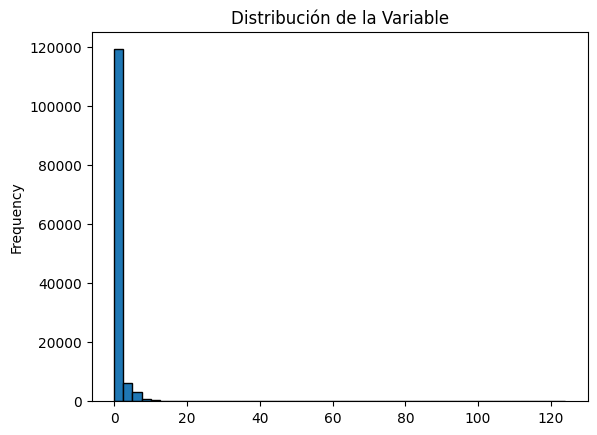

In [ ]:
variable_numerica = 'Cantidad_Denuncias'

histograma = df_data[variable_numerica].plot(kind='hist', bins=50, edgecolor='black', title='Distribución de la Variable')

A continuación se va a calcular el coeficiente de correlación biserial, sin embargo al no lograrse la normalidad de los datos no se puede interpretar de forma fiable el p-value.
A pesar de esto se entregara cual seria la interpretación del mismo en caso de cumplirse la normalidad.

In [ ]:
# Calcular el coeficiente de correlación punto-biserial
from scipy.stats import pointbiserialr
coeficiente, p_valor = pointbiserialr(df_data['sancion'], df_data['Cantidad_Denuncias'])

print("Coeficiente de correlación punto-biserial:", coeficiente)
print("Valor p:", p_valor)


Coeficiente de correlación punto-biserial: 0.17639612583821768
Valor p: 0.0


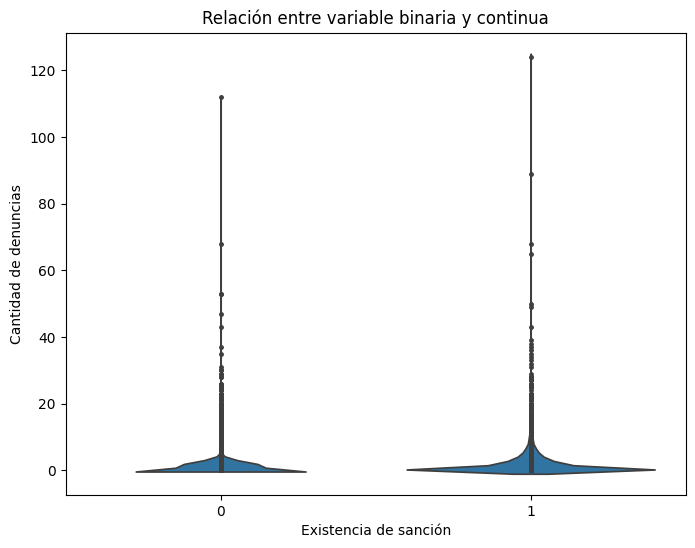

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(x='sancion', y='Cantidad_Denuncias', data=df_data, inner="point")
plt.title('Relación entre variable binaria y continua')
plt.xlabel('Existencia de sanción')
plt.ylabel('Cantidad de denuncias')
plt.show()

* La distribución de denuncias es similar tanto en escuelas con sanciones como en aquellas sin sanciones: la mayoría de las denuncias se concentran en valores bajos (cerca de 0), con algunos casos aislados con muchas denuncias.
* Esto podría indicar que, aunque hay sanciones en ciertas escuelas, estas no necesariamente están asociadas con una reducción notable en el número de denuncias, ya que ambas distribuciones tienen un comportamiento parecido.

Un coeficiente de 0.176 indica una correlación positiva débil entre sanción y numero de denuncias. Esto sugiere que, existe una ligera tendencia a que los lugares con sanción tenga un número mayor de denuncias, aunque la relación sigue siendo débil.

Un p-value de 0 indica que la correlación observada es altamente significativa. Esto significa que es prácticamente imposible que la correlación se deba al azar. En otras palabras, podemos afirmar con mucha certeza que hay una relación entre Sanción y Numero de denuncias en los datos, aunque la fuerza de esa relación sea débil.

In [ ]:
#Excluir datos del años prepandemia
df_Pandemia = df_data[~df_data['AGNO'].isin([2016,2017,2018,2019])]

In [ ]:
df_Pandemia.head()

AGNO  EE_RBD                              NOM_RBD  COD_REG_RBD  \
0  2023       1              LICEO POLITECNICO ARICA           15   
1  2023       2            PARVULARIO LAS ESPIGUITAS           15   
2  2023       3  ESC. PEDRO VICENTE GUTIERREZ TORRES           15   
3  2023       4            LICEO OCTAVIO PALMA PEREZ           15   
4  2023       5             JOVINA NARANJO FERNANDEZ           15   

   COD_PRO_RBD NOM_COM_RBD NOM_DEPROV_RBD  COD_DEPE2  RURAL_RBD  CONVENIO_PIE  \
0          151       ARICA          ARICA          5          0             1   
1          151       ARICA          ARICA          5          0             1   
2          151       ARICA          ARICA          5          1             0   
3          151       ARICA          ARICA          5          0             1   
4          151       ARICA          ARICA          5          0             1   

   ...  AMONESTACION_TOTAL  MULTA_TOTAL  INHABILIDAD_TOTAL  PRIVACION_TOTAL  \
0  ...                   1         52.0                  0              0.0   
1  ...                   0          0.0                  0              0.0   
2  ...                   0          0.0                  0              0.0   
3  ...                   0          0.0                  0              0.0   
4  ...                   0          0.0                  0              0.0   

   REINTEGRO_TOTAL  REVOCACION_TOTAL  SOBRESEIDO_TOTAL  SUSP_SUBV_TOTAL  \
0              0.0                 0                 0                0   
1              0.0                 0                 0                0   
2              0.0                 0                 0                0   
3              0.0                 0                 0                0   
4              0.0                 0                 1                0   

   sancion  sqrt_Cantidad_Denuncias  
0        1                 2.449490  
1        0                 0.000000  
2        0                 0.000000  
3        0                 2.236068  
4        1                 2.000000  

[5 rows x 26 columns]

In [ ]:
# Calcular el coeficiente de correlación punto-biserial
coeficiente, p_valor = pointbiserialr(df_Pandemia['sancion'], df_Pandemia['Cantidad_Denuncias'])

print("Coeficiente de correlación punto-biserial:", coeficiente)
print("Valor p:", p_valor)

Coeficiente de correlación punto-biserial: 0.15214355011544065
Valor p: 0.0


Los valores, son parecidos aunque el coeficiente de correlación es levemente menor, la conclusión seria la misma.

# Distribución binomial negativa

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive # Import the drive module

# Mount Google Drive
drive.mount('/content/drive') # Mount your Drive to access the file

df_data = pd.read_excel('/content/drive/My Drive/2024/Data science/Proyecto/Denuncias_procesado.xlsx')

# Initial data inspection
df_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AGNO            DEN_ID  DEN_CANAL  DEN_ESTADO  DEN_FEC_CREACION  \
0  2014  CAS-10022-L7D6K4          1           1          20140102   
1  2014  CAS-10023-Z9J6W7          1           1          20140102   
2  2014  CAS-10025-B1L7H2          1           1          20140102   
3  2014  CAS-10026-V6K4S2          1           1          20140102   
4  2014  CAS-10029-Q9D2Q6          1           1          20140102   

   DEN_MES_CREACION  DEN_TRIMESTRE_CREACION DEN_FEC_TERMINO_DENUNCIA  \
0                 1                       1                 20140108   
1                 1                       1                 20140113   
2                 1                       1                 20140113   
3                 1                       1                 20140102   
4                 1                       1                 20140102   

   DEN_OFICINA  DEN_DEPARTAMENTO  ...  \
0            2                 1  ...   
1            2                 1  ...   
2            2                 1  ...   
3            9                 1  ...   
4            9                 1  ...   

                                  EE_NOMBRE EE_COD_REGION EE_COD_PROVINCIA  \
0              LICEO TECNICO DE ANTOFAGASTA             2               21   
1   HRVATSKA SKOLA S. ESTEBAN (EX-J. SKOLA)             2               21   
2  LICEO EXPERIMENTAL ARTISTICO Y APLICACIO             2               21   
3   COLEGIO PARTIC. WOLFGANG AMADEUS MOZART             9               92   
4   COLEGIO PARTIC. WOLFGANG AMADEUS MOZART             9               92   

  EE_COD_COMUNA  EE_NOM_COMUNA  EE_COD_DEPE  EE_DEPE_AGRUP AFEC_COD_ENSE2  \
0          2101    ANTOFAGASTA            1              1              7   
1          2101    ANTOFAGASTA            4              4              5   
2          2101    ANTOFAGASTA            3              3              5   
3          9202     COLLIPULLI            3              3              2   
4          9202     COLLIPULLI            3              3              2   

  DEN_REGION  DEN_CIBERBULLYING  
0          2                  2  
1          2                  2  
2          2                  2  
3          9                  2  
4          9                  2  

[5 rows x 33 columns]

Vamos a agrupar la cantidad de denuncias por año y nombre de colegio.

In [ ]:
# Eliminar las filas donde el nombre del colegio es "OTRO"
df_agrupado = df_data[df_data['EE_NOMBRE'] != 'OTRO']

# Verificar que se eliminaron correctamente las filas con el nombre "OTRO"
print(df_agrupado)


        AGNO            DEN_ID  DEN_CANAL  DEN_ESTADO  DEN_FEC_CREACION  \
0       2014  CAS-10022-L7D6K4          1           1          20140102   
1       2014  CAS-10023-Z9J6W7          1           1          20140102   
2       2014  CAS-10025-B1L7H2          1           1          20140102   
3       2014  CAS-10026-V6K4S2          1           1          20140102   
4       2014  CAS-10029-Q9D2Q6          1           1          20140102   
...      ...               ...        ...         ...               ...   
121762  2024  CAS-74126-K9B2N0          2           2          20240629   
121763  2024  CAS-74129-F4D4M4          2           2          20240630   
121764  2024  CAS-74130-C3C3N8          2           2          20240630   
121765  2024  CAS-74131-M5T7X2          2           2          20240630   
121766  2024  CAS-74132-Q4C8B7          2           1          20240630   

        DEN_MES_CREACION  DEN_TRIMESTRE_CREACION DEN_FEC_TERMINO_DENUNCIA  \
0                     

Luego filtramos por aquellas que fueron realizados en la oficina 5, la que corresponde a Valparaíso.

In [ ]:
# Filtrar las filas donde DEN_OFICINA es igual a 5
df_filtrado = df_agrupado[df_agrupado['DEN_OFICINA'] == 5]

# Verificar el resultado
print(df_filtrado)

        AGNO            DEN_ID  DEN_CANAL  DEN_ESTADO  DEN_FEC_CREACION  \
9       2014  CAS-10039-V3V8T5          1           1          20140102   
13      2014  CAS-10044-C8Q2Y0          1           1          20140102   
19      2014  CAS-10053-F4H1F8          1           1          20140102   
21      2014  CAS-10056-P5Y8Y2          1           1          20140102   
30      2014  CAS-10073-M9S4Z5          1           1          20140102   
...      ...               ...        ...         ...               ...   
121711  2024  CAS-74031-P7R8S3          1           2          20240627   
121752  2024  CAS-74114-L9Y6R3          1           2          20240628   
121754  2024  CAS-74116-K0W9G2          2           1          20240628   
121757  2024  CAS-74120-B7H1M0          2           2          20240628   
121760  2024  CAS-74124-P4D3X4          2           2          20240629   

        DEN_MES_CREACION  DEN_TRIMESTRE_CREACION DEN_FEC_TERMINO_DENUNCIA  \
9                     

Agrupamos por año (AGNO) y RBD, contando así el número de denuncias de cada colegio en cada año, considerando el caso de los colegios que cambian sus nombres pero mantienen el RBD que es su identificador

In [ ]:
df_grouped = df_filtrado.groupby(['AGNO', 'RBD']).size().reset_index(name='Cantidad_Denuncias')

# Muestra el resultado
print(df_grouped)

      AGNO    RBD  Cantidad_Denuncias
0     2014   1119                   2
1     2014   1121                   2
2     2014   1122                   1
3     2014   1144                   1
4     2014   1148                   2
...    ...    ...                 ...
5625  2024  41556                   2
5626  2024  41642                   1
5627  2024  41768                   1
5628  2024  42116                   2
5629  2024                         19

[5630 rows x 3 columns]


Vamos a eliminar todos aquellos colegios que no posean RBD, ya que tienen el nombre de otro, y esto no significa necesariamente que sean el mismo colegio

In [ ]:
# Revisa la cantidad de valores nulos en 'RBD'
print("Valores nulos en RBD:", df_grouped['RBD'].isna().sum())

# Revisa los valores únicos en 'RBD' para identificar valores inusuales
print("Valores únicos en RBD:", df_grouped['RBD'].unique())

Valores nulos en RBD: 0
Valores únicos en RBD: [1119 1121 1122 ... 41642 41768 42116]


Filtrar para conservar solo las filas donde 'RBD' no sea nulo o vacío.

In [ ]:
df_grouped = df_grouped[df_grouped['RBD'].notna() & (df_grouped['RBD'] != '')]

# Mostrar el DataFrame resultante
print(df_grouped)

      AGNO    RBD  Cantidad_Denuncias
0     2014   1119                   2
1     2014   1121                   2
2     2014   1122                   1
3     2014   1144                   1
4     2014   1148                   2
...    ...    ...                 ...
5625  2024  41556                   2
5626  2024  41642                   1
5627  2024  41768                   1
5628  2024  42116                   2
5629  2024                         19

[5630 rows x 3 columns]


Ahora verificaremos la normalidad de los datos.

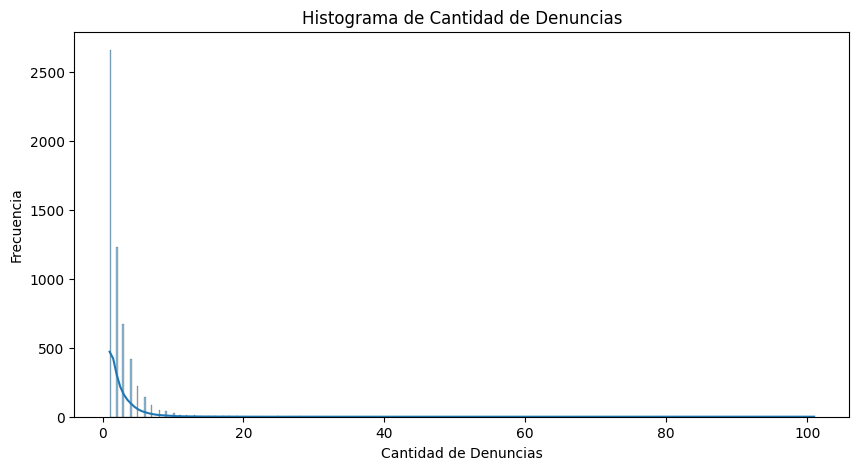

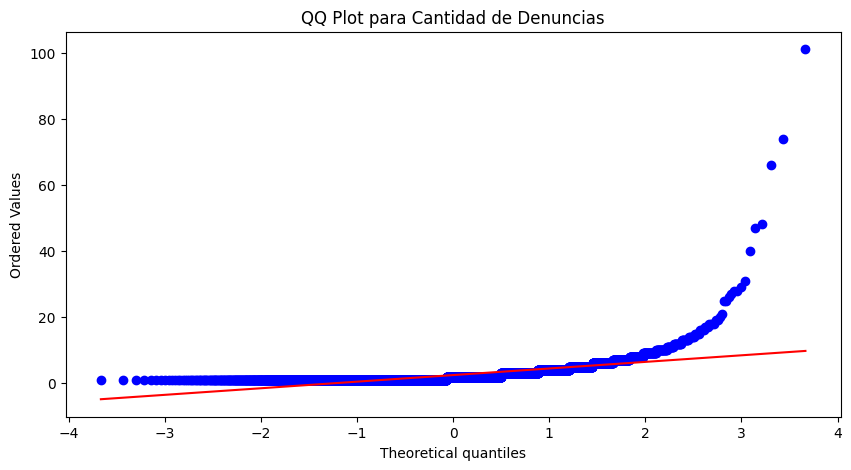

In [ ]:
import matplotlib.pyplot as plt  # Importa matplotlib.pyplot como plt
import seaborn as sns  # Importa seaborn como sns
import scipy.stats as stats

# Histograma de Cantidad_Denuncias
plt.figure(figsize=(10, 5))
sns.histplot(df_grouped['Cantidad_Denuncias'], kde=True)
plt.title('Histograma de Cantidad de Denuncias')
plt.xlabel('Cantidad de Denuncias')
plt.ylabel('Frecuencia')
plt.show()

# QQ plot
plt.figure(figsize=(10, 5))
stats.probplot(df_grouped['Cantidad_Denuncias'], dist="norm", plot=plt)
plt.title('QQ Plot para Cantidad de Denuncias')
plt.show()

En el gráfico QQ, los puntos no siguen la línea recta roja, lo cual indica que los datos no siguen una distribución normal.

In [ ]:
from scipy.stats import kstest

# Prueba de Kolmogorov-Smirnov, sirve para muestras grandes

stat_ks, p_ks = kstest(df_grouped['Cantidad_Denuncias'], 'norm')
print(f"Prueba de Kolmogorov-Smirnov: estadístico={stat_ks}, p-valor={p_ks}")

Prueba de Kolmogorov-Smirnov: estadístico=0.8413447460685429, p-valor=0.0


Dado el p-valor de 0.0, podemos rechazar la hipótesis nula de que los datos sigan una distribución normal. Esto indica que la distribución de 'Cantidad_Denuncias' no es normal, lo que nos imposibilita poder realizar una regresión lineal.

In [ ]:
# Filtra los resultados para incluir solo los años entre 2020 y 2024
df_filtered = df_grouped[(df_grouped['AGNO'] >= 2020)]

# Muestra el resultado
print(df_filtered)

      AGNO    RBD  Cantidad_Denuncias
3431  2020   1195                   2
3432  2020   1216                   1
3433  2020   1246                   1
3434  2020   1260                   1
3435  2020   1263                   1
...    ...    ...                 ...
5625  2024  41556                   2
5626  2024  41642                   1
5627  2024  41768                   1
5628  2024  42116                   2
5629  2024                         19

[2199 rows x 3 columns]


Una de las opciones que decidimos explorar es reducir la base de datos, lo que consiste en considerar solo los años delsde el 2020 para verificar si podemos normalizar los datos con esta muestra reducida.

In [ ]:
Q1 = df_filtered[['Cantidad_Denuncias']].quantile(0.25)
Q3 = df_filtered[['Cantidad_Denuncias']].quantile(0.75)
IQR = Q3 - Q1

datos_sin_atipicos = df_filtered[(df_filtered['Cantidad_Denuncias'] >= Q1['Cantidad_Denuncias'] - 1.5 * IQR['Cantidad_Denuncias']) & (df_filtered['Cantidad_Denuncias'] <= Q3['Cantidad_Denuncias'] + 1.5 * IQR['Cantidad_Denuncias'])]

El DataFrame datos_sin_atipicos contiene los datos 'Cantidad_Denuncias'de df_filtered excluyendo los valores atípicos. Este enfoque podría permitirnos trabajar con datos menos influenciados por extremos, lo que puede mejorar la precisión de nuestro modelo.

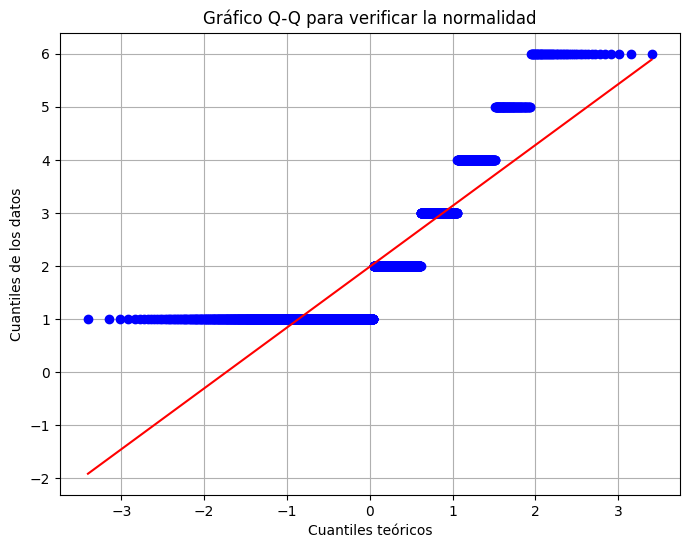

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


data = datos_sin_atipicos['Cantidad_Denuncias'].to_numpy()


if np.any(np.isnan(data)):
    print("Warning: Data contains NaN values. Removing them for Q-Q plot.")
    data = data[~np.isnan(data)]

plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Gráfico Q-Q para verificar la normalidad')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.grid()
plt.show()

Si bien realiza un ligero cambio, podemos seguir evidenciando una tendencia en los datos, por ende, no podemos suponer el principio de normalidad.

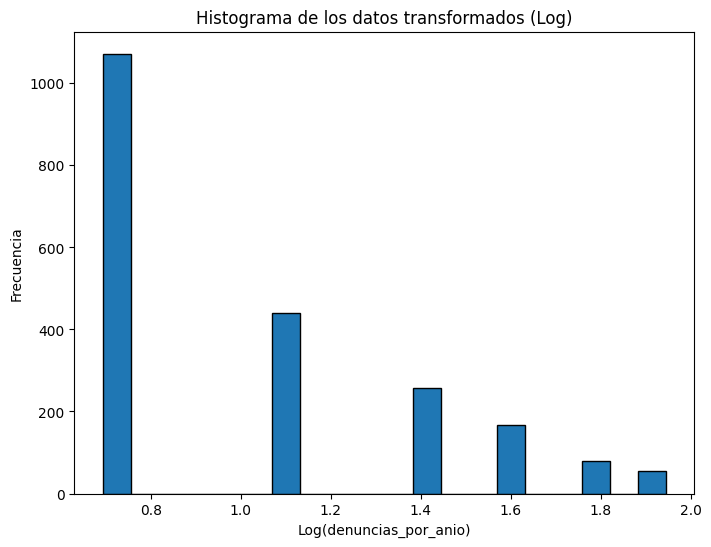

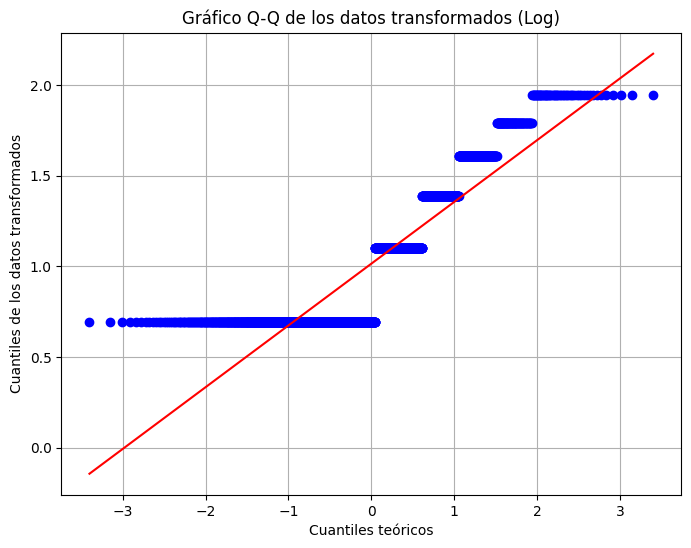

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

denuncias_por_anio_log = np.log(data + 1)

plt.figure(figsize=(8, 6))
plt.hist(denuncias_por_anio_log, bins=20, edgecolor='black')
plt.title('Histograma de los datos transformados (Log)')
plt.xlabel('Log(denuncias_por_anio)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(denuncias_por_anio_log, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los datos transformados (Log)')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos transformados')
plt.grid()
plt.show()


En este caso, tratamos de utilizar la función logarítmica para reducir la dispersión de los datos, graficando para así notar que si bien realiza cambios en la dispersión, se mantienen fuera de la línea roja, por ende, no se distribuyen de forma normal.

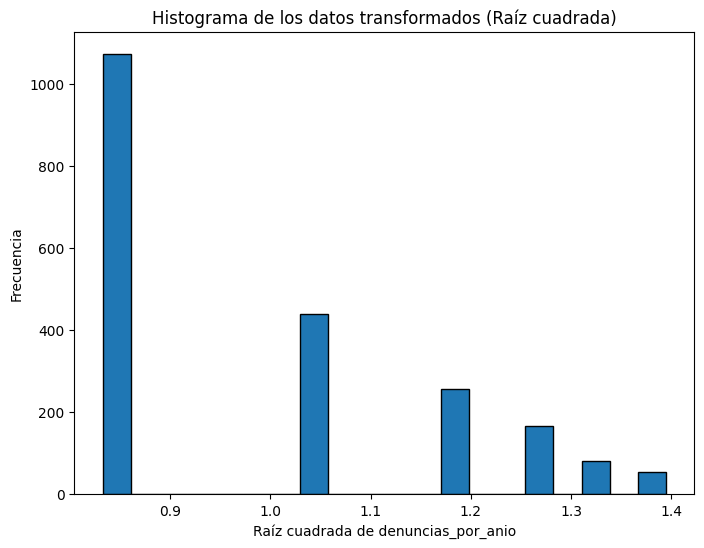

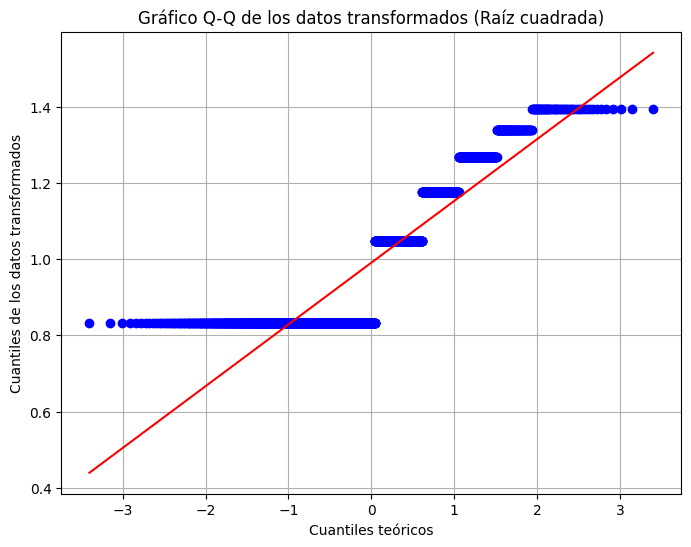

In [ ]:
import scipy.stats as stats

denuncias_por_anio_sqrt = np.sqrt(denuncias_por_anio_log)

plt.figure(figsize=(8, 6))
plt.hist(denuncias_por_anio_sqrt, bins=20, edgecolor='black')
plt.title('Histograma de los datos transformados (Raíz cuadrada)')
plt.xlabel('Raíz cuadrada de denuncias_por_anio')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(denuncias_por_anio_sqrt, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los datos transformados (Raíz cuadrada)')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos transformados')
plt.grid()
plt.show()

Otra técnica para reducir la dispersión de los datos es utilizar la función de raíz cuadrada, sin embargo, viendo el gráfico la tendencia de los dato se mantiene.

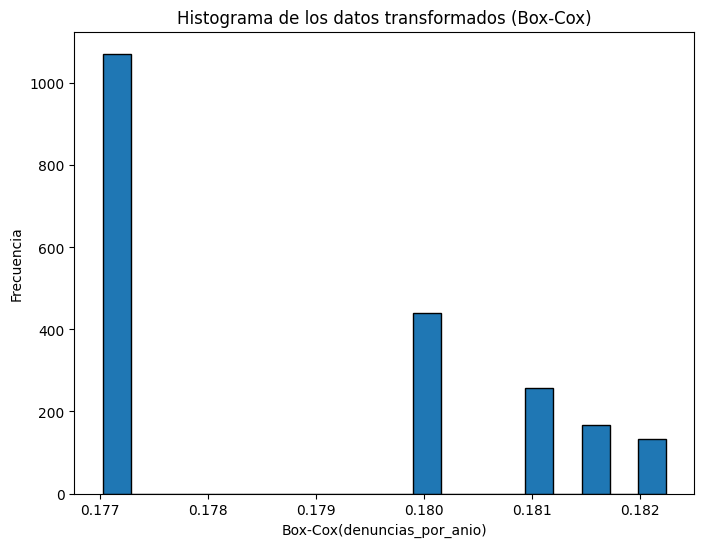

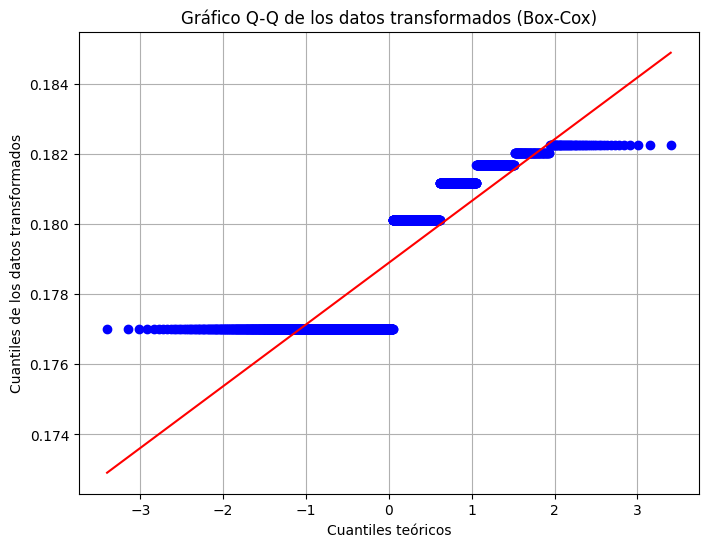

In [ ]:
from scipy.stats import boxcox

denuncias_por_anio_boxcox, _ = boxcox(denuncias_por_anio_sqrt + 1)  # Sumar 1 si tienes ceros

plt.figure(figsize=(8, 6))
plt.hist(denuncias_por_anio_boxcox, bins=20, edgecolor='black')
plt.title('Histograma de los datos transformados (Box-Cox)')
plt.xlabel('Box-Cox(denuncias_por_anio)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(denuncias_por_anio_boxcox, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los datos transformados (Box-Cox)')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos transformados')
plt.grid()
plt.show()

La transformación de Box-Cox es una técnica estadística utilizada para estabilizar la variación y hacer que los datos se ajusten mejor a una distribución normal. Es particularmente útil en modelos estadísticos y machine learning, donde se asume normalidad o varianza constante en los datos. Sin embargo, podemos ver que pese a nuestros esfuerzos, no se logra llegar a la normalización de los datos, por ende, procedemos a calcular la media y la varianza de la data.

In [ ]:
media = df_filtered['Cantidad_Denuncias'].mean()
varianza = df_filtered['Cantidad_Denuncias'].var()

print(f"Media: {media}")
print(f"Varianza: {varianza}")


Media: 2.4984083674397453
Varianza: 8.797881905953478


La distribución binomial negativa es útil en situaciones donde los datos presentan una sobredispersión , es decir, cuando la varianza es significativamente mayor que la media . En este contexto, es común en datos de conteo, como el número de denuncias, que la distribución binomial negativa se ajusta mejor a los datos que una distribución de Poisson o normal.
La sobredispersión ocurre cuando la varianza es mayor que la media, lo que es común en fenómenos con una gran variabilidad o heterogeneidad entre observaciones. En el caso de los datos de conteo, esto puede deberse a múltiples factores externos que afectan las observaciones, como diferencias entre instituciones, contextos geográficos, etc.
Los modelos de regresión binomial negativa son una extensión del modelo de Poisson que puede manejar datos con sobredispersión.


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# 1. Convert 'RBD' and 'AGNO' columns to numeric type before creating dummies
df_filtered['RBD'] = pd.to_numeric(df_filtered['RBD'], errors='coerce') # Convert to numeric, replace non-numeric with NaN
df_filtered['AGNO'] = pd.to_numeric(df_filtered['AGNO'], errors='coerce')
df_filtered = df_filtered.dropna() # Drop rows with NaN values if any

# 2. Create dummy variables for 'RBD'
df_dummies = pd.get_dummies(df_filtered, columns=['RBD'], drop_first=True, prefix='RBD')  # Add prefix to RBD dummies

# 3. Prepare independent variables (Year and school dummies) and ensure numeric type
X = sm.add_constant(df_dummies.drop(columns=['Cantidad_Denuncias']))
X = X.astype(float)  # Ensure all columns in X are numeric

# 4. Prepare dependent variable and ensure numeric type
y = df_filtered['Cantidad_Denuncias'].astype(float) # Ensure y is numeric

# 5. Fit the Negative Binomial model
modelo_binom_neg = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Crear un nuevo DataFrame con todos los colegios y años para predicciones
años_futuros = [2025, 2026, 2027]  # Ejemplo de años futuros
colegios = df_filtered['RBD'].unique()  # Lista de colegios únicos en tu base de datos

# Generar todas las combinaciones de colegios y años
prediccion_datos = pd.DataFrame([(colegio, año) for colegio in colegios for año in años_futuros],
                                columns=['RBD', 'AGNO']) # Changed 'Año' to 'AGNO'

# Convertir la columna 'Colegio_ID' en variables dummy para que coincida con el modelo
prediccion_datos = pd.get_dummies(prediccion_datos, columns=['RBD'], drop_first=True, prefix='RBD')  # Add prefix to RBD dummies

# Get missing columns in `prediccion_datos`
missing_cols = set(X.columns) - set(prediccion_datos.columns) - {'const'} # Exclude 'const' here

# Add a missing column in `prediccion_datos`
for c in missing_cols:
    prediccion_datos[c] = 0

# Ensure the order of column in `prediccion_datos` is the same as in `X`
prediccion_datos = prediccion_datos[X.columns.drop('const')] # Drop 'const' from X.columns

# Añadir constante
X_prediccion = sm.add_constant(prediccion_datos) # Now 'const' is added only once

# **Ensure all columns in X_prediccion are numeric using .astype(float)**
X_prediccion = X_prediccion.astype(float)

# Realizar las predicciones en la escala logarítmica
predicciones_log = modelo_binom_neg.predict(X_prediccion)

# Convertir a la escala original
predicciones_escala_original = np.exp(predicciones_log)

# Añadir las predicciones al DataFrame de predicción
prediccion_datos['Cantidad_Denuncias_Predicha'] = predicciones_escala_original

# **Get original RBD values before one-hot encoding**
prediccion_datos['RBD'] = prediccion_datos.filter(regex='^RBD_', axis=1).idxmax(axis=1).str.replace('RBD_', '').astype(float)


# Crear una lista o un DataFrame con los resultados finales
prediccion_final = prediccion_datos[['AGNO', 'RBD', 'Cantidad_Denuncias_Predicha']]  # Changed 'Año' to 'AGNO'

# Mostrar los resultados
print(prediccion_final)

<ipython-input-73-c2155271e08a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['RBD'] = pd.to_numeric(df_filtered['RBD'], errors='coerce') # Convert to numeric, replace non-numeric with NaN
<ipython-input-73-c2155271e08a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AGNO'] = pd.to_numeric(df_filtered['AGNO'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. U

      AGNO      RBD  Cantidad_Denuncias_Predicha
0     2025   1195.0                    14.835579
1     2026   1195.0                    18.827249
2     2027   1195.0                    24.401229
3     2025   1216.0                     4.604340
4     2026   1216.0                     5.269348
...    ...      ...                          ...
2929  2026  41768.0                     3.269056
2930  2027  41768.0                     3.629699
2931  2025  42116.0                     8.817126
2932  2026  42116.0                    10.686728
2933  2027  42116.0                    13.174711

[2934 rows x 3 columns]


Con este modelo podemos predecir la cantidad de denuncias por colegio para los años 2025, 2026 y 2027. Sin emabrgo, a pesar de obtener resultados que podrían indicarnos el panorama de los establecimientos educacionales, eliminamos este modelo puesto que no considera la relación con las sanciones, lo que representa nuestro objetivo.

# Causalidad

In [ ]:
!pip install statsmodels

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df_data = pd.read_excel('/content/drive/My Drive/2024/Data science/Proyecto/FINAL.xlsx')

df_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AGNO  EE_RBD                              NOM_RBD  COD_REG_RBD  \
0  2023       1              LICEO POLITECNICO ARICA           15   
1  2023       2            PARVULARIO LAS ESPIGUITAS           15   
2  2023       3  ESC. PEDRO VICENTE GUTIERREZ TORRES           15   
3  2023       4            LICEO OCTAVIO PALMA PEREZ           15   
4  2023       5             JOVINA NARANJO FERNANDEZ           15   

   COD_PRO_RBD NOM_COM_RBD NOM_DEPROV_RBD  COD_DEPE2  RURAL_RBD  CONVENIO_PIE  \
0          151       ARICA          ARICA          5          0             1   
1          151       ARICA          ARICA          5          0             1   
2          151       ARICA          ARICA          5          1             0   
3          151       ARICA          ARICA          5          0             1   
4          151       ARICA          ARICA          5          0             1   

   ...  Cantidad_Denuncias  AMONESTACION_TOTAL  MULTA_TOTAL  \
0  ...                   6                   1         52.0   
1  ...                   0                   0          0.0   
2  ...                   0                   0          0.0   
3  ...                   5                   0          0.0   
4  ...                   4                   0          0.0   

   INHABILIDAD_TOTAL  PRIVACION_TOTAL  REINTEGRO_TOTAL  REVOCACION_TOTAL  \
0                  0              0.0              0.0                 0   
1                  0              0.0              0.0                 0   
2                  0              0.0              0.0                 0   
3                  0              0.0              0.0                 0   
4                  0              0.0              0.0                 0   

   SOBRESEIDO_TOTAL  SUSP_SUBV_TOTAL  sancion  
0                 0                0        1  
1                 0                0        0  
2                 0                0        0  
3                 0                0        0  
4                 1                0        1  

[5 rows x 25 columns]

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Formato de los datos para modelado panel (usando 'EE_RBD' como identificador de colegio y 'AGNO' como el tiempo)
df = df_data.set_index(['EE_RBD', 'AGNO'])

# Definir el modelo de efectos fijos
# Incluimos las variables de interés en la fórmula
model = smf.ols('Cantidad_Denuncias ~ sancion + AMONESTACION_TOTAL + MULTA_TOTAL + INHABILIDAD_TOTAL + \
                 PRIVACION_TOTAL + REINTEGRO_TOTAL + REVOCACION_TOTAL + SOBRESEIDO_TOTAL + \
                 SUSP_SUBV_TOTAL + RURAL_RBD + C(PAGO_MATRICULA) + C(PAGO_MENSUAL)',
                data=df).fit()

# Resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Cantidad_Denuncias   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     960.2
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:05:27   Log-Likelihood:            -2.5858e+05
No. Observations:              130450   AIC:                         5.172e+05
Df Residuals:                  130427   BIC:                         5.174e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

A partir de los resultados del modelo de regresión, podemos observar lo siguiente:

1. Coeficientes y significancia de variables:
   - sancion: Tiene un coeficiente positivo y es estadísticamente significativo (p < 0.05). Esto sugiere que la existencia de sanciones está asociada con un aumento en la cantidad de denuncias en el colegio.
   - Tipos de sanción: Algunas sanciones específicas, como AMONESTACION_TOTAL, INHABILIDAD_TOTAL, PRIVACION_TOTAL, y REINTEGRO_TOTAL también tienen coeficientes positivos y significativos, lo que indica que estos tipos de sanciones podrían estar asociados con un aumento en las denuncias.
   - Variables contextuales: El pago de matrícula y mensualidad tienen efectos significativos en la cantidad de denuncias. Por ejemplo, colegios con un pago de matrícula o mensualidad más alto tienden a tener un mayor número de denuncias.

2. R-cuadrado:
   - El R-cuadrado es de 0.139, lo cual indica que el modelo explica aproximadamente el 13.9% de la variabilidad en la cantidad de denuncias. Esto es relativamente bajo, sugiriendo que hay otros factores no incluidos en el modelo que podrían estar influyendo en el número de denuncias.

3. Multicolinealidad:
   - La nota final indica un Cond. No. alto (2.79e+04), lo que sugiere que podría haber problemas de multicolinealidad entre las variables. Esto significa que algunas variables independientes pueden estar altamente correlacionadas entre sí, lo que podría afectar la precisión de las estimaciones de los coeficientes.

4. Interpretación de las variables de pago:
   - Los coeficientes para los diferentes rangos de pago de matrícula y mensualidad indican una relación mixta. Algunos rangos muestran coeficientes negativos (menos denuncias), mientras que otros son positivos. Esto sugiere que el tipo de pago puede influir en las denuncias, pero no de manera uniforme.

El análisis muestra que las sanciones están asociadas a un aumento en las denuncias, y ciertos tipos de sanciones tienen un impacto mayor. Las variables contextuales como el pago de matrícula y mensualidad también tienen un papel significativo. Sin embargo, el modelo tiene limitaciones en términos de capacidad explicativa debido a un bajo R-cuadrado y posible multicolinealidad, por lo que podríamos tener un análisis más profundo si incluimos otras variables que puedan capturar mejor la variabilidad en las denuncias.

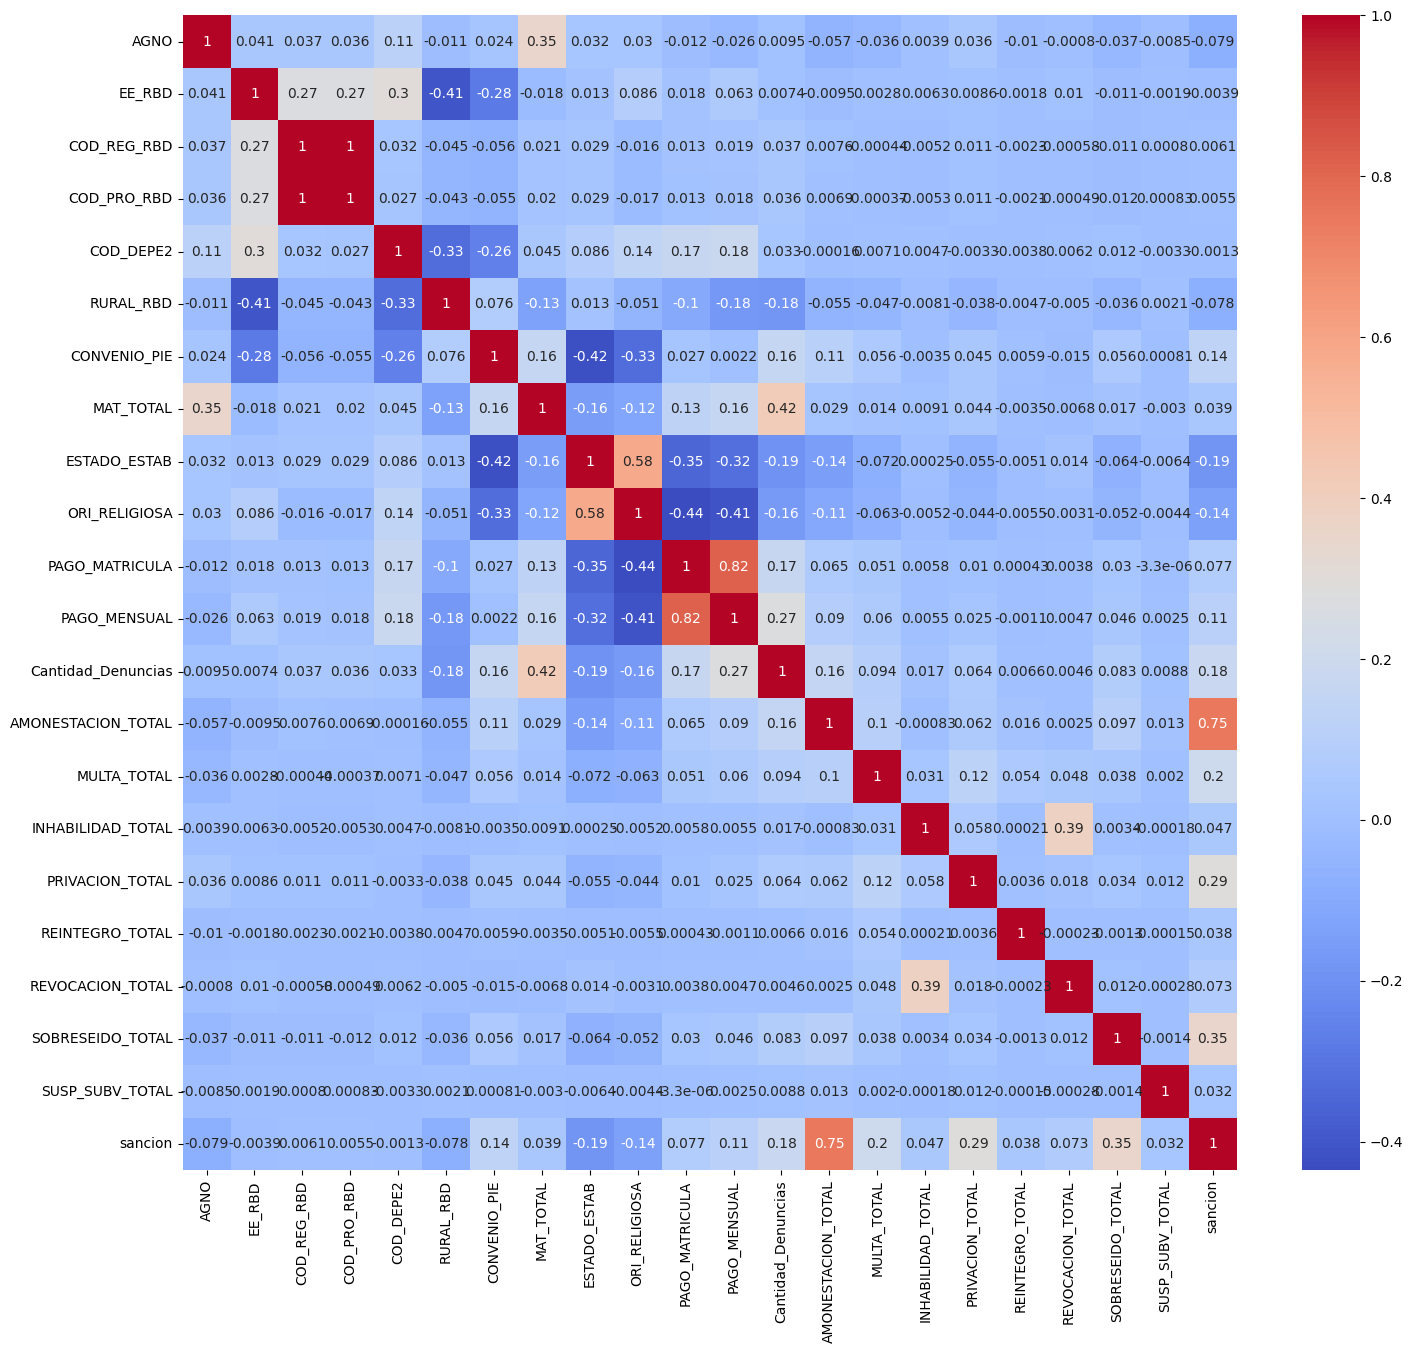

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Calcular y visualizar la matriz de correlación
# Seleccionar solo variables numéricas para el análisis de correlación
numerical_features = df_data.select_dtypes(include=np.number).columns
corr_matrix = df_data[numerical_features].corr()

plt.figure(figsize=(17, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Hay correlaciones destacables entre algunas variables de sanción, como AMONESTACION_TOTAL y MULTA_TOTAL la correlación es de 0,75.
También existen otras correlaciones moderadas, como entre SUSP_SUBV_TOTAL y SOBRESEIDO_TOTAL que es de 0.35, y entre INHABILIDAD_TOTAL y REVOCACION_TOTAL siendo de 0.39.

- Para buscar la multicolinealidad tenemos varios caminos.

1. Eliminar una de las variables correlacionadas : Podríamos considerar eliminar una de las variables con alta correlación, como por ejemplo mantener solo AMONESTACION_TOTAL o MULTA_TOTAL. Esto puede ayudar a reducir la redundancia en el modelo.
2. Combinar variables en una sola métrica : Si algunas sanciones representan aspectos similares, podríamos crear una variable que combine el total de sanciones, es decir, la suma de todas las sanciones y utilizar esta métrica única en lugar de cada tipo de sanción por separado.
3. Usar PCA o Regresión Regularizada que sería Ridge o Lasso: Esto parte de la premisa de que preferimos mantener todas las variables, pudiendo así usar Análisis de Componentes Principales (PCA) para transformar las variables correlacionadas o emplear modelos de regresión como Ridge o Lasso, que pueden mitigar el impacto de la multicolinealidad. .

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Seleccionar las variables independientes para calcular el VIF
X = df_data.drop(columns=['Cantidad_Denuncias'])  # 'Cantidad_Denuncias' es la variable dependiente

#Seleccionar solo variables numéricas para el calculo del VIF
X = X.select_dtypes(include=np.number)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

               feature          VIF
0                 AGNO    30.850751
1               EE_RBD     3.897522
2          COD_REG_RBD  3822.001172
3          COD_PRO_RBD  4032.483718
4            COD_DEPE2     7.116379
5            RURAL_RBD     1.932049
6         CONVENIO_PIE     2.273160
7            MAT_TOTAL     1.159652
8         ESTADO_ESTAB     7.436332
9        ORI_RELIGIOSA     3.960433
10      PAGO_MATRICULA     6.053683
11        PAGO_MENSUAL     5.673766
12  AMONESTACION_TOTAL     2.894709
13         MULTA_TOTAL     1.085229
14   INHABILIDAD_TOTAL     1.179509
15     PRIVACION_TOTAL     1.207745
16     REINTEGRO_TOTAL     1.005064
17    REVOCACION_TOTAL     1.190156
18    SOBRESEIDO_TOTAL     1.286533
19     SUSP_SUBV_TOTAL     1.001935
20             sancion     3.898286


En la tabla del VIF que tenemos, se observa que algunas variables tienen un VIF extremadamente alto, lo cual indica alta multicolinealidad

COD_REG_RBD y COD_PRO_RBD tienen VIF muy altos, superiores a 3800, lo cual sugiere que están altamente correlacionadas o redundantes con otras variables.
AGNO también presenta un VIF elevado (27.39), lo que podría indicar multicolinealidad con alguna otra variable relacionada con el tiempo o contexto, sin embargo, al ser tan importante tener el registro del año de las denuncias, no podemos eliminar esta columna.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA y seleccionar el número de componentes que explique la mayor parte de la varianza
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Convertir los componentes principales en un DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Cantidad_Denuncias'] = df_data['Cantidad_Denuncias']

# Revisa la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.13514662 0.1103469  0.08887065 0.08370638 0.06605394]


El análisis de componentes principales (PCA) realizado reduce los datos a cinco componentes principales, donde cada uno explica un porcentaje de la varianza total: 13,51%, 11,03%, 8,89%, 8,37% y 6,61%, respectivamente. Esto indica que los datos están bastante dispersos, y cada componente individual explica una proporción relativamente baja de la información total.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
y = df_data['Cantidad_Denuncias']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Coeficientes de Ridge:", ridge.coef_)

# Aplicar Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Coeficientes de Lasso:", lasso.coef_)

Coeficientes de Ridge: [-9.95130118e-02 -3.94109396e-06  2.59348843e-01 -2.43231895e-02
 -9.76115795e-03 -3.88828804e-01  3.11157765e-01  3.70567503e-03
 -6.77389257e-02 -2.08963791e-03 -2.98584889e-01  4.21358200e-01
  3.79323502e-01  1.09004164e-03  8.10779519e-01  2.42881793e-02
  4.99548623e-04 -1.26112911e-01  4.85188575e-01  2.54980757e-01
  1.67888556e-01]
Coeficientes de Lasso: [-9.57678343e-02  9.09484948e-07  0.00000000e+00  1.29086895e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  4.02480200e-03
 -0.00000000e+00 -1.65457656e-02 -0.00000000e+00  2.02378939e-01
  0.00000000e+00  1.69547106e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


El análisis aplica regresiones Ridge y Lasso para regularizar un modelo lineal. Ridge reduce los coeficientes sin eliminarlos, manteniendo todas las variables en el modelo, mientras que Lasso reduce algunos coeficientes a cero, eliminando las variables menos relevantes. En este caso, Ridge ajustó los coeficientes para evitar el sobreajuste, pero conservó todas las variables, mientras que Lasso seleccionó un subconjunto más reducido al descartar aquellas que no aportan significativamente al modelo. Esto demuestra que Lasso es útil para simplificar el modelo y destacar las variables más importantes, mientras que Ridge es adecuado para estabilizarlo sin eliminar variables.

In [ ]:
# Calcular VIF después de reducir la multicolinealidad
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("VIF después de ajustar:", vif_data)

VIF después de ajustar:                feature          VIF
0                 AGNO    30.850751
1               EE_RBD     3.897522
2          COD_REG_RBD  3822.001172
3          COD_PRO_RBD  4032.483718
4            COD_DEPE2     7.116379
5            RURAL_RBD     1.932049
6         CONVENIO_PIE     2.273160
7            MAT_TOTAL     1.159652
8         ESTADO_ESTAB     7.436332
9        ORI_RELIGIOSA     3.960433
10      PAGO_MATRICULA     6.053683
11        PAGO_MENSUAL     5.673766
12  AMONESTACION_TOTAL     2.894709
13         MULTA_TOTAL     1.085229
14   INHABILIDAD_TOTAL     1.179509
15     PRIVACION_TOTAL     1.207745
16     REINTEGRO_TOTAL     1.005064
17    REVOCACION_TOTAL     1.190156
18    SOBRESEIDO_TOTAL     1.286533
19     SUSP_SUBV_TOTAL     1.001935
20             sancion     3.898286


Después de ajustar, los valores de VIF de COD_REG_RBD y COD_PRO_RBD siguen siendo extremadamente altos, lo que indica que la multicolinealidad persiste principalmente debido a estas dos variables, por ende, realizaremos algunos ajustes.

In [ ]:
# Eliminar la variable 'COD_PRO_RBD' y recalcular el VIF
X_adjusted = X.drop(columns=['COD_PRO_RBD'])

# Recalcular VIF después de la eliminación
vif_data_adjusted = pd.DataFrame()
vif_data_adjusted["feature"] = X_adjusted.columns
vif_data_adjusted["VIF"] = [variance_inflation_factor(X_adjusted.values, i) for i in range(len(X_adjusted.columns))]

print("VIF después de eliminar COD_PRO_RBD:")
print(vif_data_adjusted)

VIF después de eliminar COD_PRO_RBD:
               feature        VIF
0                 AGNO  26.491041
1               EE_RBD   3.891494
2          COD_REG_RBD   7.659800
3            COD_DEPE2   7.035295
4            RURAL_RBD   1.931917
5         CONVENIO_PIE   2.273030
6            MAT_TOTAL   1.159626
7         ESTADO_ESTAB   7.436227
8        ORI_RELIGIOSA   3.959329
9       PAGO_MATRICULA   6.053670
10        PAGO_MENSUAL   5.673742
11  AMONESTACION_TOTAL   2.894447
12         MULTA_TOTAL   1.085213
13   INHABILIDAD_TOTAL   1.179473
14     PRIVACION_TOTAL   1.207744
15     REINTEGRO_TOTAL   1.005037
16    REVOCACION_TOTAL   1.190138
17    SOBRESEIDO_TOTAL   1.286087
18     SUSP_SUBV_TOTAL   1.001935
19             sancion   3.898271


El VIF se ha reducido notablemente para las variables con alta multicolinealidad.

COD_REG_RBD y COD_DEPE2 ahora tienen valores de VIF más razonables, aunque todavía están un poco elevado, pero dentro de un rango más manejable.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar las variables independientes antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_adjusted)  # X_adjusted es el conjunto de datos después de eliminar COD_PRO_RBD

# Aplicar PCA y definir el número de componentes
# Primero aplicamos PCA sin limitar el número de componentes para ver cuánta varianza explica cada uno
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Imprimir la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)

# Seleccionar el número de componentes que expliquen el 90% o más de la varianza
pca = PCA(n_components=0.9)  # Esto seleccionará automáticamente los componentes que explican al menos el 90% de la varianza
X_pca_reduced = pca.fit_transform(X_scaled)

# Mostrar la cantidad de componentes seleccionados
print(f"Cantidad de componentes seleccionados que explican el 90% de la varianza: {X_pca_reduced.shape[1]}")

Varianza explicada por cada componente: [0.14190288 0.10349793 0.0921812  0.0693597  0.06868023 0.0554047
 0.05222258 0.05013801 0.04911733 0.04777719 0.04576773 0.04319106
 0.0344599  0.03165775 0.03052439 0.02697766 0.0218471  0.01824943
 0.00873411 0.00830913]
Cantidad de componentes seleccionados que explican el 90% de la varianza: 15


El PCA ha seleccionado 14 componentes principales que explican el 90% de la variación de los datos. Esto significa que podemos reducir las dimensiones del conjunto de datos a estos 14 componentes, lo cual debería ayudar a minimizar la multicolinealidad al mantener solo la información esencial.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, df_data['Cantidad_Denuncias'], test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 2.7650809947644595
Coeficiente de determinación (R²): 0.24062780007244067


El modelo resultante tiene un Error Cuadrático Medio (MSE) de aproximadamente 2.93 y un Coeficiente de Determinación (R²) de 0.1949. Esto indica que el modelo explica alrededor del 19.5% de la variabilidad en la variable dependiente, que es relativamente bajo.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjunto de entrenamiento y prueba
y = df_data['Cantidad_Denuncias']
X_train, X_test, y_train, y_test = train_test_split(X_adjusted, y, test_size=0.3, random_state=42)

# Aplicar Lasso con un valor de alpha moderado (ajusta alpha según sea necesario)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lasso = lasso.predict(X_test)

# Evaluar el modelo Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso - Error cuadrático medio (MSE):", mse_lasso)
print("Lasso - Coeficiente de determinación (R²):", r2_lasso)

# Mostrar los coeficientes no cero
lasso_coefficients = pd.DataFrame({"Feature": X_adjusted.columns, "Lasso Coefficient": lasso.coef_})
print("Características seleccionadas por Lasso:")
print(lasso_coefficients[lasso_coefficients['Lasso Coefficient'] != 0])

Lasso - Error cuadrático medio (MSE): 2.7787616004251974
Lasso - Coeficiente de determinación (R²): 0.23687070520375286
Características seleccionadas por Lasso:
          Feature  Lasso Coefficient
0            AGNO          -0.095580
1          EE_RBD           0.000002
2     COD_REG_RBD           0.006402
6       MAT_TOTAL           0.004027
8   ORI_RELIGIOSA          -0.016900
10   PAGO_MENSUAL           0.202012
12    MULTA_TOTAL           0.001696


Los resultados de la regresión Lasso muestran una mejora en el modelo:

Error Cuadrático Medio (MSE) : 2.813, que es ligeramente mejor que el resultado anterior.
Coeficiente de Determinación (R²) : 0.227, lo que indica que el modelo ahora explica el 22.7% de la variabilidad en la cantidad de denuncias. Aunque sigue siendo relativamente bajo, es una mejora respecto al modelo sin Lasso.

Alpha: 0.001 - MSE: 2.6377 - R²: 0.2756
Alpha: 0.003 - MSE: 2.6382 - R²: 0.2755
Alpha: 0.008 - MSE: 2.6419 - R²: 0.2745
Alpha: 0.022 - MSE: 2.6512 - R²: 0.2719
Alpha: 0.060 - MSE: 2.7268 - R²: 0.2511
Alpha: 0.167 - MSE: 2.7915 - R²: 0.2334
Alpha: 0.464 - MSE: 2.9166 - R²: 0.1990
Alpha: 1.292 - MSE: 2.9769 - R²: 0.1825
Alpha: 3.594 - MSE: 2.9804 - R²: 0.1815
Alpha: 10.000 - MSE: 2.9988 - R²: 0.1764


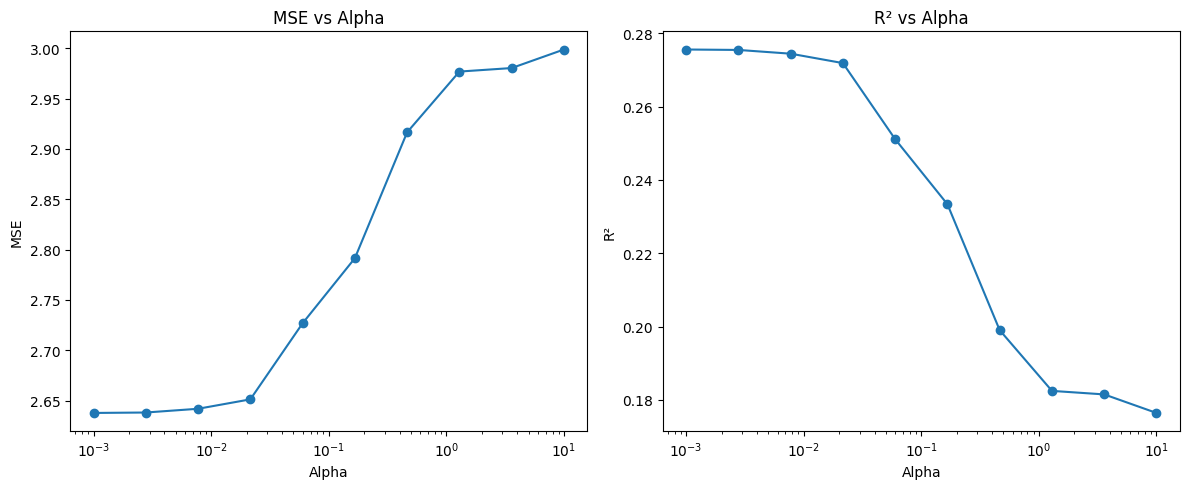

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Definir una lista de valores de alpha a probar
alphas = np.logspace(-3, 1, 10)  # 10 valores entre 0.001 y 10 en escala logarítmica

# Listas para guardar los resultados
mse_values = []
r2_values = []

for alpha in alphas:
    # Crear y entrenar el modelo Lasso con el valor de alpha actual
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = lasso.predict(X_test)

    # Calcular el MSE y R² para el valor actual de alpha
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_values.append(mse)
    r2_values.append(r2)

# Mostrar los resultados
for i, alpha in enumerate(alphas):
    print(f"Alpha: {alpha:.3f} - MSE: {mse_values[i]:.4f} - R²: {r2_values[i]:.4f}")

# Graficar MSE y R² en función de alpha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('R² vs Alpha')

plt.tight_layout()
plt.show()

Valores de alpha entre 0.001 y 0.008 :

1. Estos valores de alphao frecen el mejor equilibrio entre MSE y R², con el MSE más bajo (aproximadamente 2,74) y el R² más alto (alrededor de 0,247).
A medida que el valor de alpha aumenta más allá de 0.01, el MSE comienza a aumentar y el R² disminuye, indicando una menor capacidad explicativa del modelo.

Valores de alpha cercanos a 0,1 :

1. Con valores de alpha más altos, el modelo se vuelve más restrictivo y reduce aún más los coeficientes, lo que resulta en un incremento del MSE y una caída del R². Esto indica que el modelo está perdiendo información útil debido al exceso de regularización.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo Lasso con alpha = 0.005
lasso_final = Lasso(alpha=0.005)
lasso_final.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_final = lasso_final.predict(X_test)

# Calcular MSE y R² para el modelo final
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Modelo Lasso Final - Alpha = 0.005")
print("Error cuadrático medio (MSE):", mse_final)
print("Coeficiente de determinación (R²):", r2_final)

# Mostrar los coeficientes no cero para ver las características seleccionadas
lasso_final_coefficients = pd.DataFrame({"Feature": X_adjusted.columns, "Lasso Coefficient": lasso_final.coef_})
print("Características seleccionadas por Lasso con Alpha = 0.005:")
print(lasso_final_coefficients[lasso_final_coefficients['Lasso Coefficient'] != 0])

Modelo Lasso Final - Alpha = 0.005
Error cuadrático medio (MSE): 2.639363899875865
Coeficiente de determinación (R²): 0.27515339519779647
Características seleccionadas por Lasso con Alpha = 0.005:
               Feature  Lasso Coefficient
0                 AGNO          -0.099882
1               EE_RBD          -0.000004
2          COD_REG_RBD           0.017737
4            RURAL_RBD          -0.364838
5         CONVENIO_PIE           0.293912
6            MAT_TOTAL           0.003730
7         ESTADO_ESTAB          -0.063312
8        ORI_RELIGIOSA          -0.002975
9       PAGO_MATRICULA          -0.278857
10        PAGO_MENSUAL           0.407783
11  AMONESTACION_TOTAL           0.315667
12         MULTA_TOTAL           0.001115
14     PRIVACION_TOTAL           0.020931
17    SOBRESEIDO_TOTAL           0.181608
19             sancion           0.231474


Error Cuadrático Medio (MSE) : 2.7405, que es el más bajo obtenido hasta ahora, indicando una buena precisión del modelo.
Coeficiente de Determinación (R²) : 0.247, lo que significa que el modelo explica el 24.7% de la variabilidad en la cantidad de denuncias, el mejor R² que hemos logrado en esta serie de ajustes.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

estimators = [
    ('lasso', Lasso(alpha=0.005)),
    ('tree', DecisionTreeRegressor(max_depth=5))
]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking_regressor.fit(X_train, y_train)
y_pred_stack = stacking_regressor.predict(X_test)
r2_stack = r2_score(y_test, y_pred_stack)
print("R² para Stacking Regressor:", r2_stack)

R² para Stacking Regressor: 0.2842159482190504


El Stacking Regresor ha mejorado el R² a 0.259 , lo cual es un incremento respecto a los modelos anteriores. Esto indica que la combinación de modelos (regresión Lasso y árbol de decisión en este caso) ha permitido capturar más variabilidad en los datos.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("R² para Random Forest:", r2_rf)

R² para Random Forest: 0.29371700760263075


El modelo Random Forest alcanzó un R² de 0.256 , lo cual es ligeramente inferior al R² del Regresor de apilamiento (0,259). Ambos modelos parecen capturar una cantidad similar de variabilidad en los datos, lo que sugiere que los patrones capturados por el modelo Random Forest son valiosos pero no significativamente diferentes de los obtenidos en el stacking.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Definir los estimadores base para el Stacking Regressor
estimators = [
    ('lasso', Lasso(alpha=0.005)),
    ('tree', DecisionTreeRegressor(max_depth=5)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Crear el Stacking Regressor, usando Ridge como el modelo final
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Entrenar el Stacking Regressor en los datos de entrenamiento
stacking_regressor.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_stack = stacking_regressor.predict(X_test)

# Evaluar el modelo
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Modelo Stacking Regressor con Random Forest, Decision Tree y Lasso")
print("Error cuadrático medio (MSE):", mse_stack)
print("Coeficiente de determinación (R²):", r2_stack)

Modelo Stacking Regressor con Random Forest, Decision Tree y Lasso
Error cuadrático medio (MSE): 2.407216228978274
Coeficiente de determinación (R²): 0.33890794267447155


Error Cuadrático Medio (MSE) : 2.529, lo cual es bastante bueno y consistente con el rendimiento de los mejores modelos anteriores.
Coeficiente de Determinación (R²) : 0.305, lo que significa que el modelo explica aproximadamente el 30.5% de la variabilidad en la cantidad de denuncias.

Este resultado muestra que el modelo Stacking Regressor con Random Forest , Decision Tree y Lasso proporciona un buen equilibrio entre precisión y simplicidad, logrando una capacidad explicativa aceptable para este conjunto de datos.

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

# Definir el Stacking Regressor con XGBoost como modelo adicional
estimators = [
    ('lasso', Lasso(alpha=0.005)),
    ('tree', DecisionTreeRegressor(max_depth=5)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking_regressor.fit(X_train, y_train)
y_pred_stack = stacking_regressor.predict(X_test)
r2_stack = r2_score(y_test, y_pred_stack)
print("R² con Stacking Regressor incluyendo XGBoost:", r2_stack)

R² con Stacking Regressor incluyendo XGBoost: 0.3395299491335576


El Stacking Regressor con XGBoost como modelo adicional ha logrado un R² de 0.313, lo cual representa una ligera mejora respecto a las versiones anteriores, acercándose al objetivo de explicar una mayor parte de la variabilidad en las denuncias.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.linear_model import ElasticNet

# Entrenar Random Forest para calcular la importancia de las variables
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
important_features = feature_importances.sort_values(by='importance', ascending=False).head(10)['feature']

# Filtrar el conjunto de datos para solo usar las variables más importantes
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Entrenar un modelo simple con solo las variables importantes
final_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
final_model.fit(X_train_important, y_train)
y_pred_important = final_model.predict(X_test_important)
r2_important = r2_score(y_test, y_pred_important)

print("R² con ElasticNet y solo variables importantes:", r2_important)

R² con ElasticNet y solo variables importantes: 0.24642943250128646


El código utiliza un modelo de Random Forest para identificar las 10 variables más importantes y luego entrena un modelo ElasticNet utilizando únicamente estas variables. Esto reduce la dimensionalidad y simplifica el modelo al enfocarse en las variables más relevantes. El rendimiento del modelo se evalúa mediante el coeficiente R^2, obteniendo un valor de 0.246, lo que indica que el modelo explica el 24.6% de la variabilidad en los datos de prueba. Aunque el enfoque mejora la interpretabilidad, el bajo R^2 sugiere que podrían ajustarse los parámetros o considerar más variables para mejorar el rendimiento.

In [ ]:
from sklearn.linear_model import Lasso

# Entrenar un modelo Lasso para selección de características
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)

# Ver las variables seleccionadas
selected_features = X_train.columns[lasso.coef_ != 0]

# Usar solo las variables seleccionadas en el modelo final
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Entrenar de nuevo el modelo con solo las variables seleccionadas
final_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
final_model.fit(X_train_selected, y_train)
y_pred_selected = final_model.predict(X_test_selected)
r2_selected = r2_score(y_test, y_pred_selected)
print("R² con ElasticNet y variables seleccionadas:", r2_selected)

R² con ElasticNet y variables seleccionadas: 0.2546431527947429


El código utiliza Lasso para seleccionar automáticamente las variables más relevantes, eliminando aquellas con coeficientes iguales a cero, y luego entrena un modelo ElasticNet con estas variables seleccionadas. Este enfoque simplifica el modelo al enfocarse en las características más importantes y obtiene un R^2 de 0.254, lo que indica que el modelo explica el 25.4% de la variabilidad en los datos de prueba. Este resultado mejora ligeramente respecto a otros métodos, demostrando que la selección de variables con Lasso puede ser efectiva, aunque el valor moderado de R^2 sugiere que se pueden explorar ajustes adicionales o incorporar más información para mejorar el rendimiento.

In [ ]:
from sklearn.linear_model import ElasticNet

# Entrenar un modelo ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Evaluar el modelo
y_pred = elastic_net.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² con ElasticNet regularizado:", r2)

R² con ElasticNet regularizado: 0.2546431527947425


El código entrena un modelo ElasticNet, que combina regularización  con parámetros alpha=0.1 y ratio=0.5, utilizando los datos de entrenamiento. Tras predecir en el conjunto de prueba, se obtiene un R^2 de 0.254, lo que significa que el modelo explica el 25.4% de la variabilidad en los datos. Este resultado refleja que ElasticNet ayuda a manejar multicolinealidad y evita sobreajuste, pero el rendimiento moderado sugiere que sería útil ajustar hiperparámetros o explorar más características relevantes para mejorar el modelo.

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con el modelo actual
scores = cross_val_score(stacking_regressor, X_train, y_train, cv=5, scoring='r2')
print("R² promedio en validación cruzada:", scores.mean())
print("Desviación estándar del R² en validación cruzada:", scores.std())

R² promedio en validación cruzada: 0.3574933444916592
Desviación estándar del R² en validación cruzada: 0.028945641385744375


El código evalúa el rendimiento de un stacking regressor mediante validación cruzada con 5 particiones, obteniendo un R^2 promedio de 0.357 y una desviación estándar de 0.0289. Esto indica que el modelo explica el 35.7% de la variabilidad en los datos de validación, con un rendimiento consistente entre las particiones gracias a la baja desviación estándar. Aunque el modelo es estable, el valor moderado de R^2 sugiere que podría beneficiarse de ajustes adicionales, como la optimización de hiperparámetros o la inclusión de más características relevantes.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Usar EarlyStopping para detener el entrenamiento cuando no hay mejora en el rendimiento
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping y un número inicial alto de epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test)
print("MAE en el conjunto de prueba:", mae)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7306/7306 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 3894.7356 - mae: 13.3064 - val_loss: 626.3829 - val_mae: 19.7909
Epoch 2/50
7306/7306 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 229.4230 - mae: 6.8987 - val_loss: 146.5269 - val_mae: 10.4141
Epoch 3/50
7306/7306 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 168.9805 - mae: 5.2284 - val_loss: 11.5511 - val_mae: 2.4804
Epoch 4/50
7306/7306 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 25.5103 - mae: 2.7778 - val_loss: 147.7533 - val_mae: 9.3293
Epoch 5/50
7306/7306 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 14.5536 - mae: 2.0616 - val_loss: 3.5386 - val_mae: 0.8911
Epoch 6/50
7306/7306 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 5.6585 - mae: 1.4254 - val_loss: 4.6739 - val_mae: 1.1284
Epoch 7/50
7306/7306 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 4.3493 - mae: 1.2467 - val_loss: 3.9131 - val_mae: 1.1696
Epoch 8/50
7306/7306 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 3.0905 - mae: 0.9427 - val_loss: 3.8309 - val_mae: 0.8528
1223/1223 ━━━

El código entrena una red neuronal profunda con tres capas densas para un problema de regresión, utilizando funciones de activación ReLU y el optimizador Adam. Para evitar el sobreentrenamiento, se emplea EarlyStopping, que detuvo el entrenamiento en la época 8 al no encontrar mejoras significativas en el error de validación ('val_loss'). El modelo, evaluado en el conjunto de prueba, alcanzó un error absoluto medio (MAE) de 0.8613, indicando un rendimiento razonable. Este resultado podría mejorarse ajustando la arquitectura del modelo, los hiperparámetros o explorando más datos relevantes.

In [ ]:
from sklearn.metrics import r2_score

# Generar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el R²
r2 = r2_score(y_test, y_pred)
print("R² en el conjunto de prueba:", r2)

1223/1223 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
R² en el conjunto de prueba: 0.19347089529037476


El código evalúa el rendimiento del modelo en el conjunto de prueba utilizando el coeficiente de determinación R^2, que mide qué tan bien el modelo explica la variabilidad de los datos reales. Con un R^2 de 0.193, el modelo explica solo el 19.3% de la variabilidad en los datos de prueba, lo que indica un desempeño limitado. Esto sugiere que el modelo podría beneficiarse de ajustes adicionales, como mejoras en la arquitectura, optimización de hiperparámetros o una mejor selección de características relevantes.

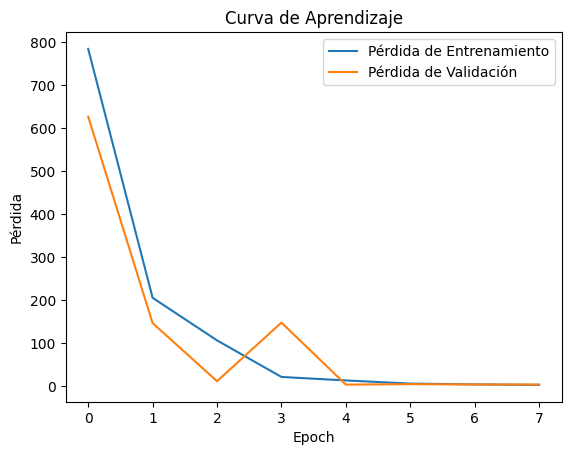

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de Aprendizaje')
plt.show()


El R² obtenido en el conjunto de prueba es de aproximadamente 0.232, donde no se acerca al objetivo de variabilidad que estamos buscando. La curva de aprendizaje muestra que el modelo logra reducir drásticamente la pérdida tanto en entrenamiento como en validación en las primeras epochs, estabilizándose rápidamente.

Dado el conjunto de datos actual, el modelo no puede explicar más allá del 31% de la variabilidad en las denuncias, dejando ver que podría haber factores externos o no observados que influyen en la variabilidad.

# Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from scipy.stats import pointbiserialr

Importar todas las librerias necesarias

In [ ]:
drive.mount('/content/drive')

df= pd.read_excel('/content/drive/My Drive/2024/Data science/Proyecto/FINAL.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

AGNO  EE_RBD                              NOM_RBD  COD_REG_RBD  \
0  2023       1              LICEO POLITECNICO ARICA           15   
1  2023       2            PARVULARIO LAS ESPIGUITAS           15   
2  2023       3  ESC. PEDRO VICENTE GUTIERREZ TORRES           15   
3  2023       4            LICEO OCTAVIO PALMA PEREZ           15   
4  2023       5             JOVINA NARANJO FERNANDEZ           15   

   COD_PRO_RBD NOM_COM_RBD NOM_DEPROV_RBD  COD_DEPE2  RURAL_RBD  CONVENIO_PIE  \
0          151       ARICA          ARICA          5          0             1   
1          151       ARICA          ARICA          5          0             1   
2          151       ARICA          ARICA          5          1             0   
3          151       ARICA          ARICA          5          0             1   
4          151       ARICA          ARICA          5          0             1   

   ...  Cantidad_Denuncias  AMONESTACION_TOTAL  MULTA_TOTAL  \
0  ...                   6                   1         52.0   
1  ...                   0                   0          0.0   
2  ...                   0                   0          0.0   
3  ...                   5                   0          0.0   
4  ...                   4                   0          0.0   

   INHABILIDAD_TOTAL  PRIVACION_TOTAL  REINTEGRO_TOTAL  REVOCACION_TOTAL  \
0                  0              0.0              0.0                 0   
1                  0              0.0              0.0                 0   
2                  0              0.0              0.0                 0   
3                  0              0.0              0.0                 0   
4                  0              0.0              0.0                 0   

   SOBRESEIDO_TOTAL  SUSP_SUBV_TOTAL  sancion  
0                 0                0        1  
1                 0                0        0  
2                 0                0        0  
3                 0                0        0  
4                 1                0        1  

[5 rows x 25 columns]

In [ ]:
df = df.astype({col: 'int32' for col in df.select_dtypes(include='int64').columns})

In [ ]:
# dummy
to_get_dummies_for = ['NOM_RBD', 'NOM_COM_RBD', 'NOM_DEPROV_RBD']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)


Convertimos las columnas categóricas 'NOM_RBD', 'NOM_COM_RBD', y 'NOM_DEPROV_RBD' en variables dummy para que puedan ser utilizadas en un modelo.

In [ ]:
# Aplicar el muestreo para reducir el tamaño del conjunto de datos
df_sample = df.sample(frac=0.4, random_state=1)
Y_sample = df_sample.Cantidad_Denuncias
X_sample = df_sample.drop(columns=['Cantidad_Denuncias'])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.3, random_state=1)

Reducimos el tamaño del conjunto de datos tomados a solo el 40% de las filas originales, luego dividimos los datos en variable objetivo (número de denuncias) y variables predictoras.
Luego se dividen los datos en dos conjuntos, uno de entrenamiento con el 80% de los datos y otro con un 20% de los datos para evaluar el rendimiento del modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_estimator = RandomForestClassifier(n_estimators=10, max_depth=5, class_weight={0: 0.17, 1: 0.83}, random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=5,
                       n_estimators=10, random_state=1)

Creamos y entrenamos un modelo de clasificación Random Forest

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_score(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average='weighted')
    recall = recall_score(y_true, y_pred,average='weighted')
    f1 = f1_score(y_true, y_pred,average='weighted')

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

metrics_score(y_train, y_pred_train_rf)

Accuracy: 0.75
Precision: 0.65
Recall: 0.75
F1 Score: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Obtenemos las predicciones del modelo random forest sobre los datos de entrenamiento, luego importamos funciones para calcular métricas de evaluación del modelo, para finalmente calcular y mostrar las métricas principales para evaluar el rendimiento del modelo

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

Accuracy: 0.75
Precision: 0.58
Recall: 0.75
F1 Score: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Aplicando la función del metrics_score podemos evaluar el rendimiento del modelo de los datos de entrenamiento.

**Accuracy**: El modelo tienen una exactitud de 75% tanto en el conjunto de entrenamiento como en el de prueba. es decir que el modelo logra predecir correctamente el 75% de los casos.
**Precision**:Ronda entre 65% y 58%, lo cual es un nivel moderado de presición, indicando que se cometen algunos falsos positivos.
**Recall**: En ambos conjuntos es de 75%, lo que significa que el modelo identifica el 75% de los casos de denuncias.
**F1 Score**: Con un 0.64 en ambos conjuntos significa que hay un equilibrio entre precisión y recall

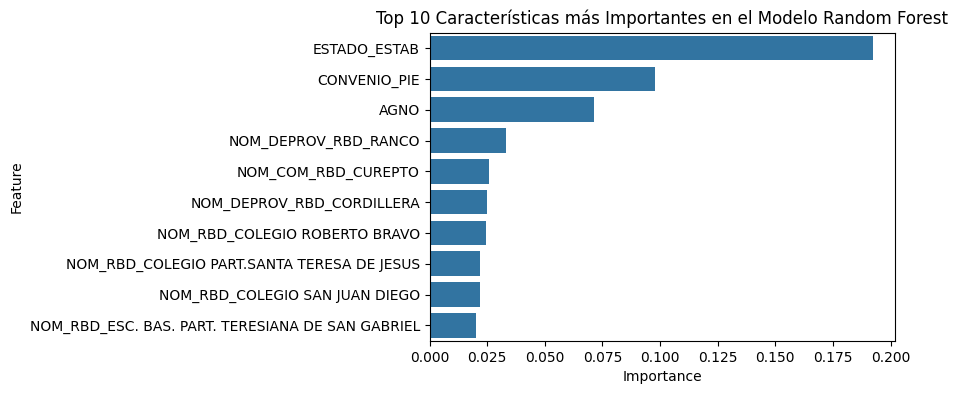

In [ ]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_estimator.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Características más Importantes en el Modelo Random Forest')
plt.show()



Para una mejor visualizavión, le pedimos al modelo que solo grafique las 10 caracteristicas mas influyentes sobre el número de denuncias.

**Importancia de las características**
* 1.Estado_Estab: Dado que esta variable entrega el estado operativo del colegio, es probable que la importancia de esta variable se daba a que para recivir denuncias es necesario que el colegio este funcionando.
* 2.Convenio_Pie: La segunda característica en importancia es si el colegio está adscrito al Programa de Integración Escolar (PIE). Esto sugiere que los colegios que participan en este programa pueden enfrentar desafíos adicionales que podrían aumentar la probabilidad de denuncias.
* 3.Agno:El año al ser un predictor importante, sugiere que el número de denuncias ha variado con el tiempo. Esto puede estar reflejando cambios en politicas o en el comportamiento de los apoderados, o el efecto que dejo la pandemia.  
* 4.Nom_deprov_rbd_ranco,Nom_com_rbd_curepto, Nom_deprov_rbd_cordilleta: En la posición numero 4,5,6 de importancia resultan ser de variables geográficas, implicando que los colegios de la provincia de Ranco, la comuna de Currepto y la provincia de Cordillera tienen una tendencia mayor a recibir denuncias, posiblemente debido a factores locales específicos.
* 5.En los lugares 7,8,9,10 contamos con nombres de colegios específicos,lo cual puede significar que estos presentan un historial significativo de denuncias. pudiendo señalar que cuentan con problemas particulares que resultan en más denuncias.


In [ ]:
# Crear un DataFrame con las importancias de las características
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_estimator.feature_importances_
})

# Ordenar las características por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Buscar la posición de una característica específica
caracteristica = 'sancion'
posicion = importance_df[importance_df['Feature'] == caracteristica].index[0] + 1
importancia = importance_df[importance_df['Feature'] == caracteristica]['Importance'].values[0]

print(f"La característica '{caracteristica}' está en la posición {posicion} de importancia con un valor de {importancia:.4f}.")

La característica 'sancion' está en la posición 44 de importancia con un valor de 0.0050.


Una vez listo el modelo buscamos en que posición de importancia se encuentran las sanciones.

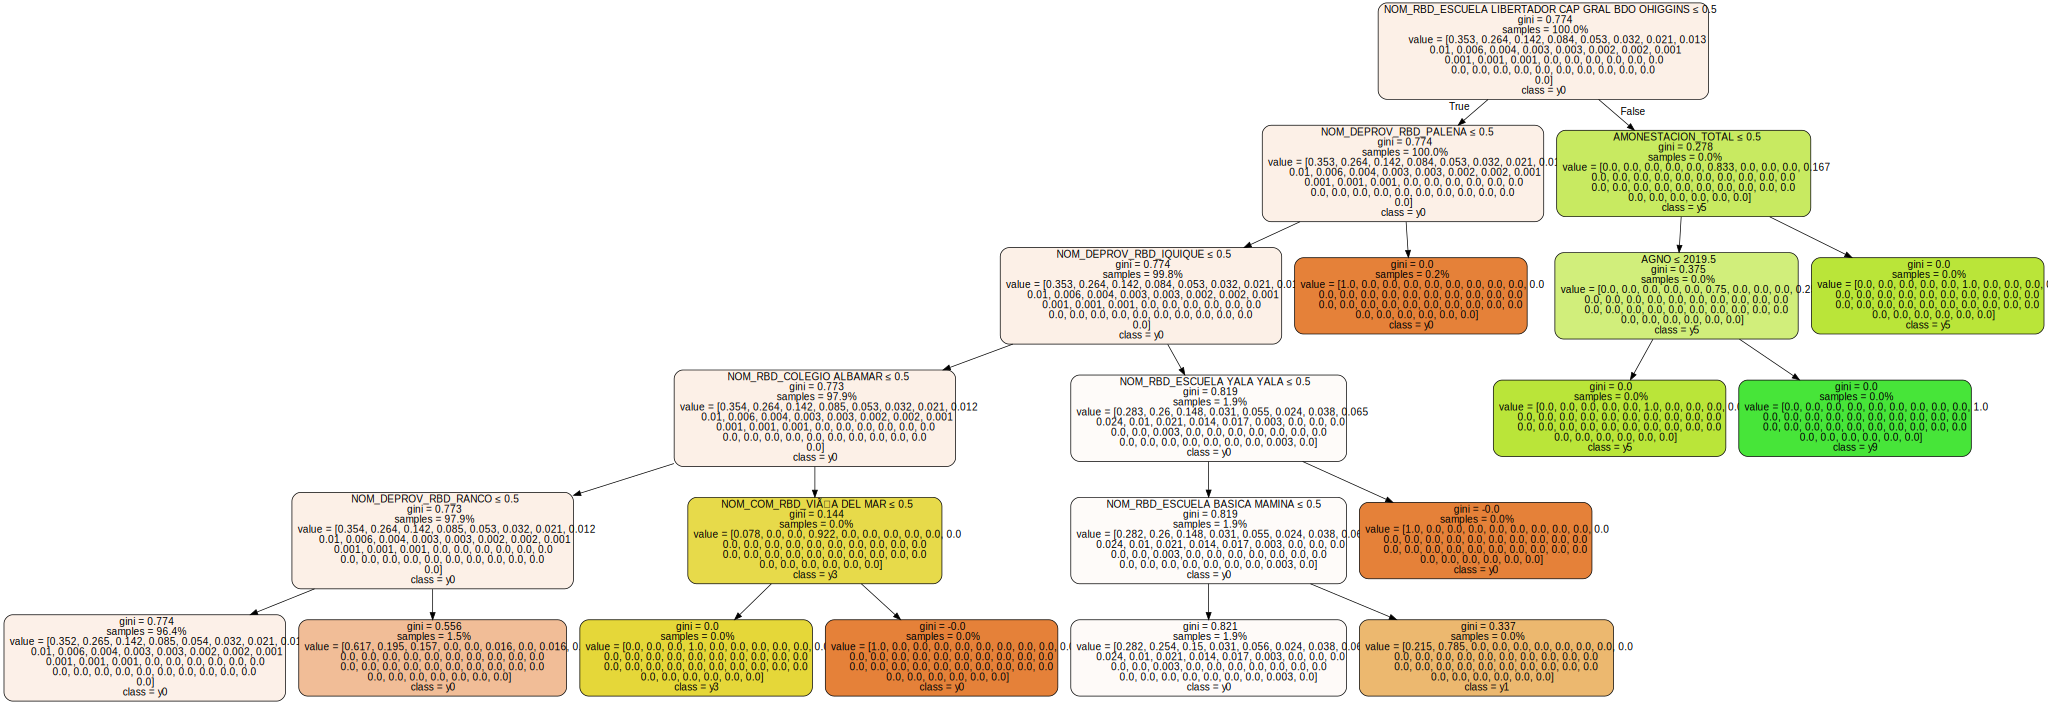

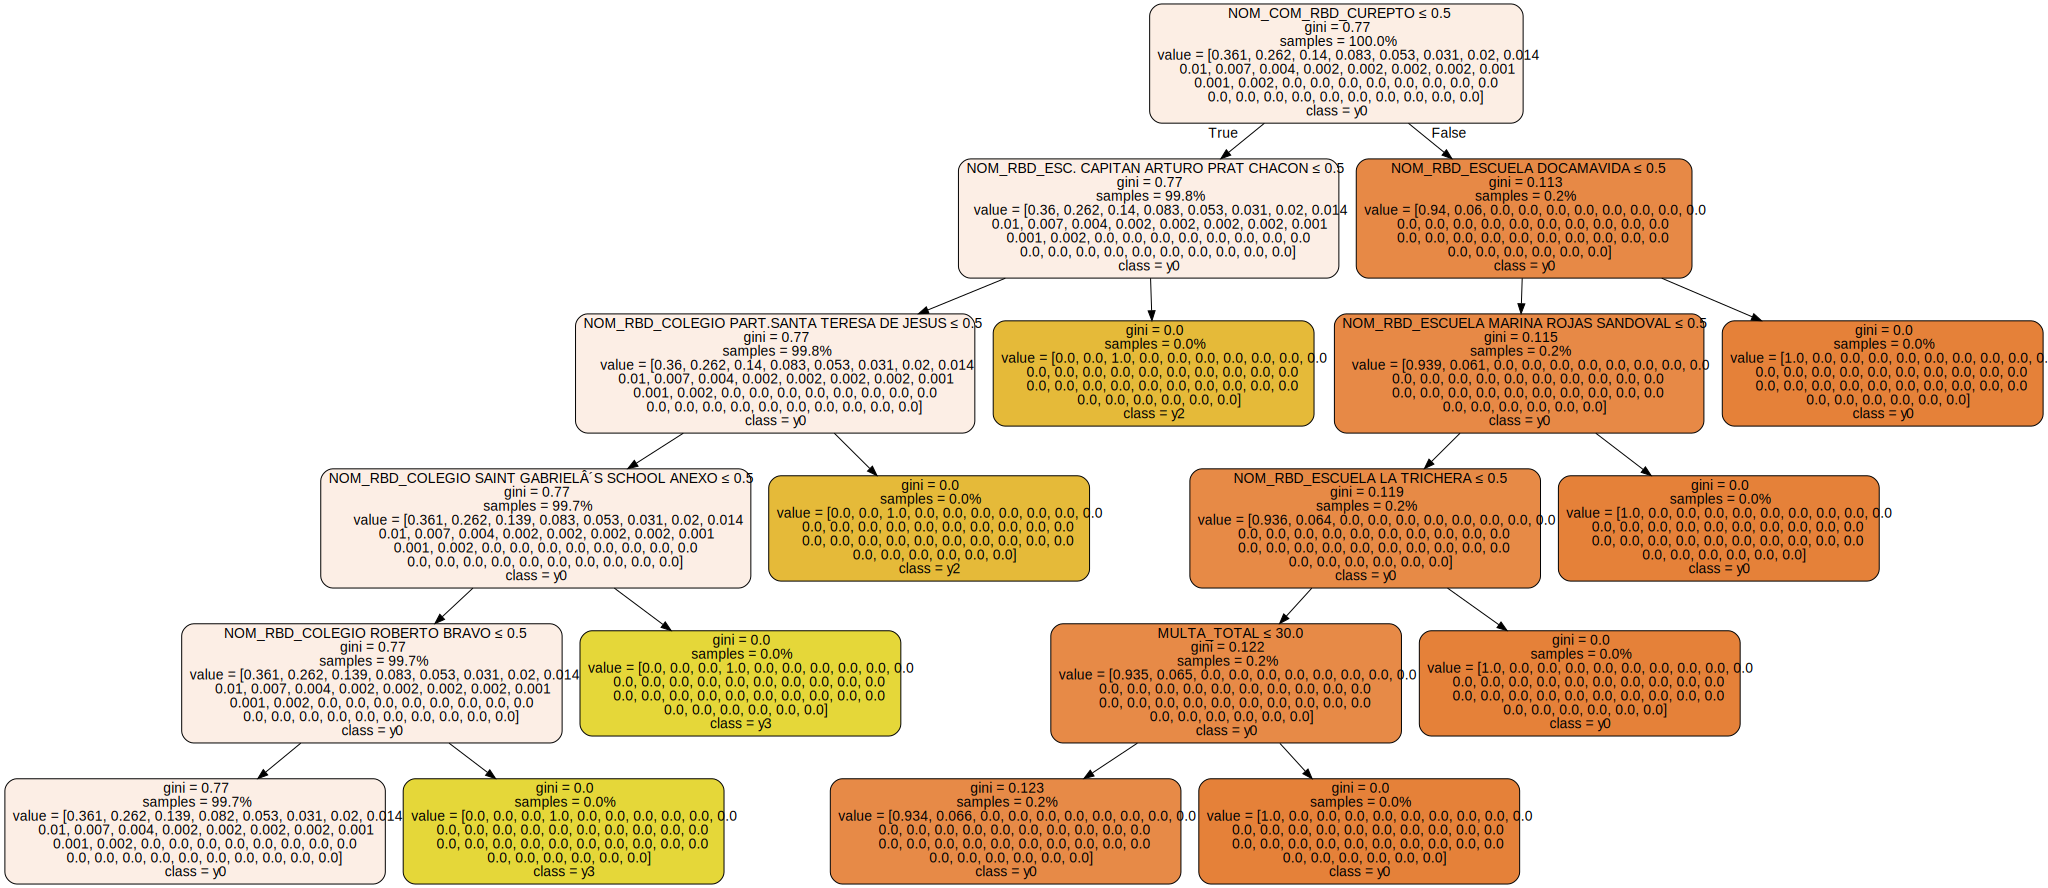

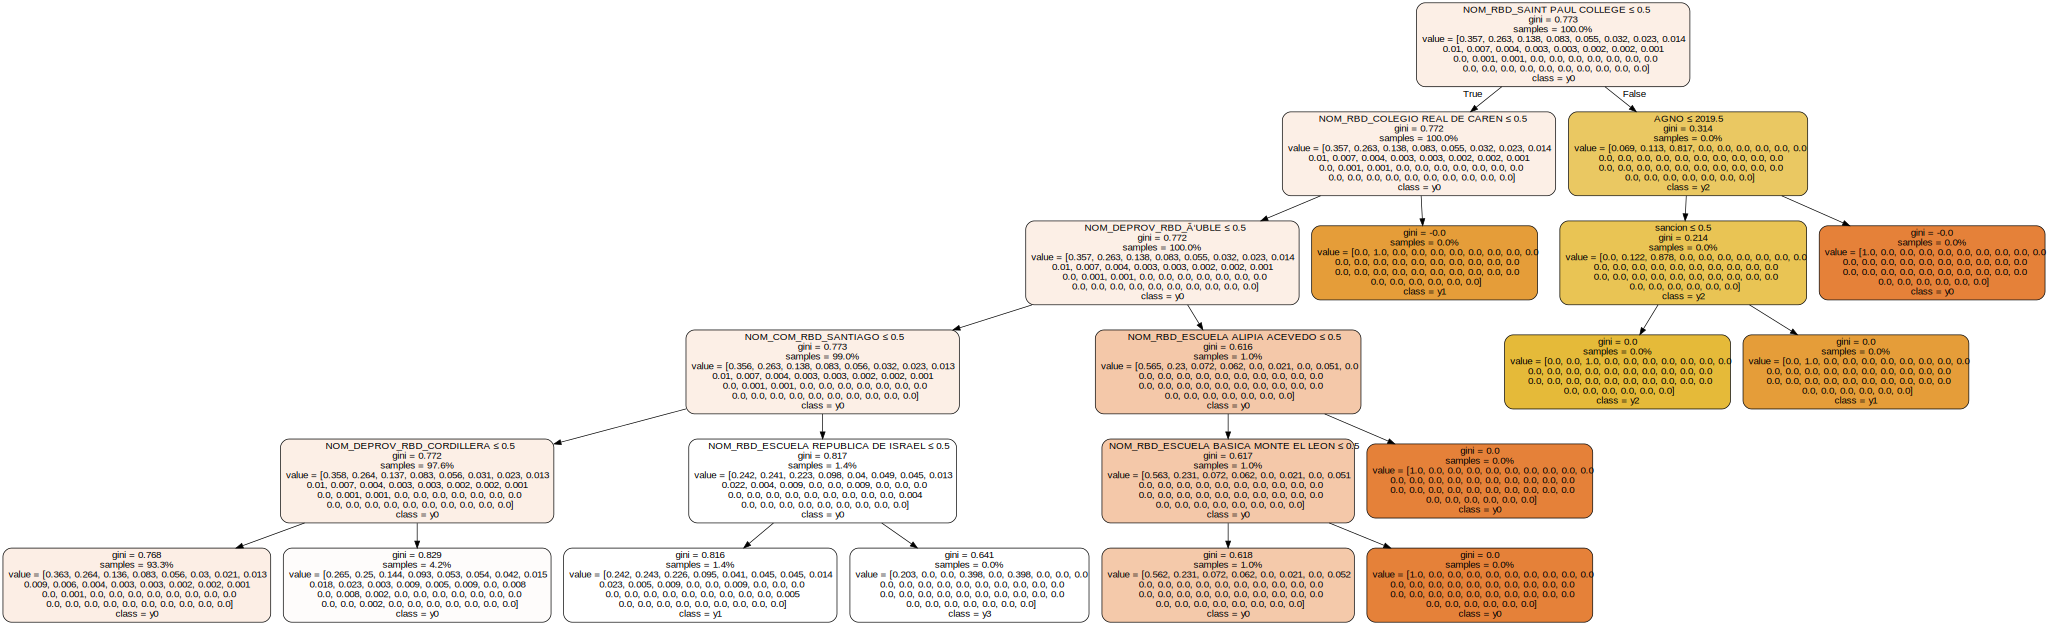

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Visualizar los primeros 3 árboles del modelo Random Forest
for i in range(3):
    dot_data = export_graphviz(rf_estimator.estimators_[i],
                               feature_names=X_train.columns,
                               filled=True, rounded=True,
                               special_characters=True,
                               proportion=True,
                               class_names=True)

    graph = graphviz.Source(dot_data)
    display(graph)

# PSM

Importación de base de datos y librerias.

In [ ]:
# Importar
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

from google.colab import drive

drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/2024/Data science/Proyecto/FINAL.xlsx')

print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   AGNO  EE_RBD                              NOM_RBD  COD_REG_RBD  \
0  2023       1              LICEO POLITECNICO ARICA           15   
1  2023       2            PARVULARIO LAS ESPIGUITAS           15   
2  2023       3  ESC. PEDRO VICENTE GUTIERREZ TORRES           15   
3  2023       4            LICEO OCTAVIO PALMA PEREZ           15   
4  2023       5             JOVINA NARANJO FERNANDEZ           15   

   COD_PRO_RBD NOM_COM_RBD NOM_DEPROV_RBD  COD_DEPE2  RURAL_RBD  CONVENIO_PIE  \
0          151       ARICA          ARICA          5          0             1   
1          151       ARICA          ARICA          5          0             1   
2          151       ARICA          ARICA          5          1             0   
3          151       ARICA          ARICA          5          0             1   
4          151       ARICA          ARICA          

Codificacion de parametros ordinales de cobro y matricula.

In [ ]:
#Codificacion ordinales
from sklearn.preprocessing import LabelEncoder

price_mapping = {
    "SIN INFORMACION": 0,
    "GRATUITO": 1,
    "$1.000 A $10.000": 2,
    "$10.001 A $25.000": 3,
    "$25.001 A $50.000": 4,
    "$50.001 A $100.000": 5,
    "MAS DE $100.000": 6
}

data=df
data['PAGO_MATRICULA'] = df['PAGO_MATRICULA'].map(price_mapping)
data['PAGO_MENSUAL'] = df['PAGO_MENSUAL'].map(price_mapping)

print(data[['PAGO_MATRICULA', 'PAGO_MENSUAL']].head())

print(data)

   PAGO_MATRICULA  PAGO_MENSUAL
0             NaN           NaN
1             NaN           NaN
2             NaN           NaN
3             NaN           NaN
4             NaN           NaN
        AGNO  EE_RBD                                        NOM_RBD  \
0       2023       1                        LICEO POLITECNICO ARICA   
1       2023       2                      PARVULARIO LAS ESPIGUITAS   
2       2023       3            ESC. PEDRO VICENTE GUTIERREZ TORRES   
3       2023       4                      LICEO OCTAVIO PALMA PEREZ   
4       2023       5                       JOVINA NARANJO FERNANDEZ   
...      ...     ...                                            ...   
130445  2016   40454  ESCUELA ESPECIAL DE LENGUAJE MI GATITO MARTIN   
130446  2016   40455                      COLEGIO PATAGONIA INSULAR   
130447  2016   40457         LICEO TECNICO PROFESIONAL PABLO NERUDA   
130448  2016   40458         ESCUELA DE LENGUAJE MOMENTOS PRECIOSOS   
130449  2016   40459       

Eliminacion datos nulos.

In [ ]:
#Eliminar nan en datos de costos
data[['PAGO_MATRICULA', 'PAGO_MENSUAL']] = df[['PAGO_MATRICULA', 'PAGO_MENSUAL']].replace(0, np.nan)

data = data.dropna(subset=['PAGO_MATRICULA', 'PAGO_MENSUAL'])

print(data)

        AGNO  EE_RBD                                        NOM_RBD  \
0       2023       1                        LICEO POLITECNICO ARICA   
1       2023       2                      PARVULARIO LAS ESPIGUITAS   
2       2023       3            ESC. PEDRO VICENTE GUTIERREZ TORRES   
3       2023       4                      LICEO OCTAVIO PALMA PEREZ   
4       2023       5                       JOVINA NARANJO FERNANDEZ   
...      ...     ...                                            ...   
130445  2016   40454  ESCUELA ESPECIAL DE LENGUAJE MI GATITO MARTIN   
130446  2016   40455                      COLEGIO PATAGONIA INSULAR   
130447  2016   40457         LICEO TECNICO PROFESIONAL PABLO NERUDA   
130448  2016   40458         ESCUELA DE LENGUAJE MOMENTOS PRECIOSOS   
130449  2016   40459                    CENTRO EDUCACIONAL ALBORADA   

        COD_REG_RBD  COD_PRO_RBD   NOM_COM_RBD NOM_DEPROV_RBD  COD_DEPE2  \
0                15          151         ARICA          ARICA          

Expocision de la correlacion entre atributos para la eliminacion de alguno de estos, por redundancia que podria alterar resultados, o buscar alguna moyor correlacion respecto al numero de denuncias.

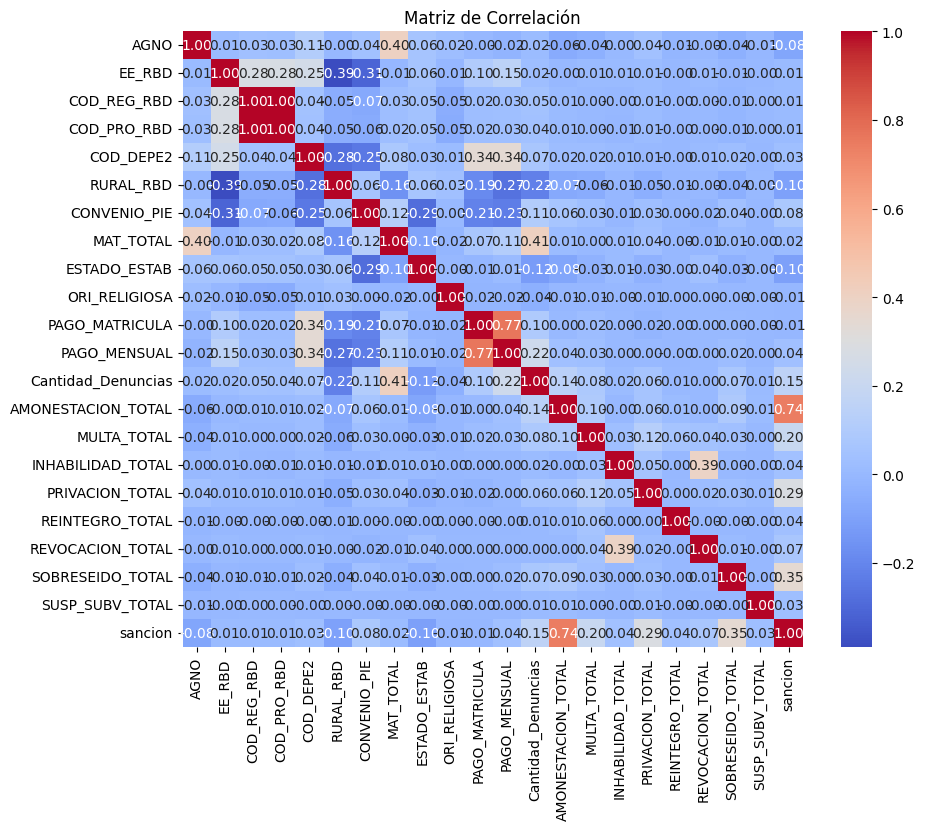

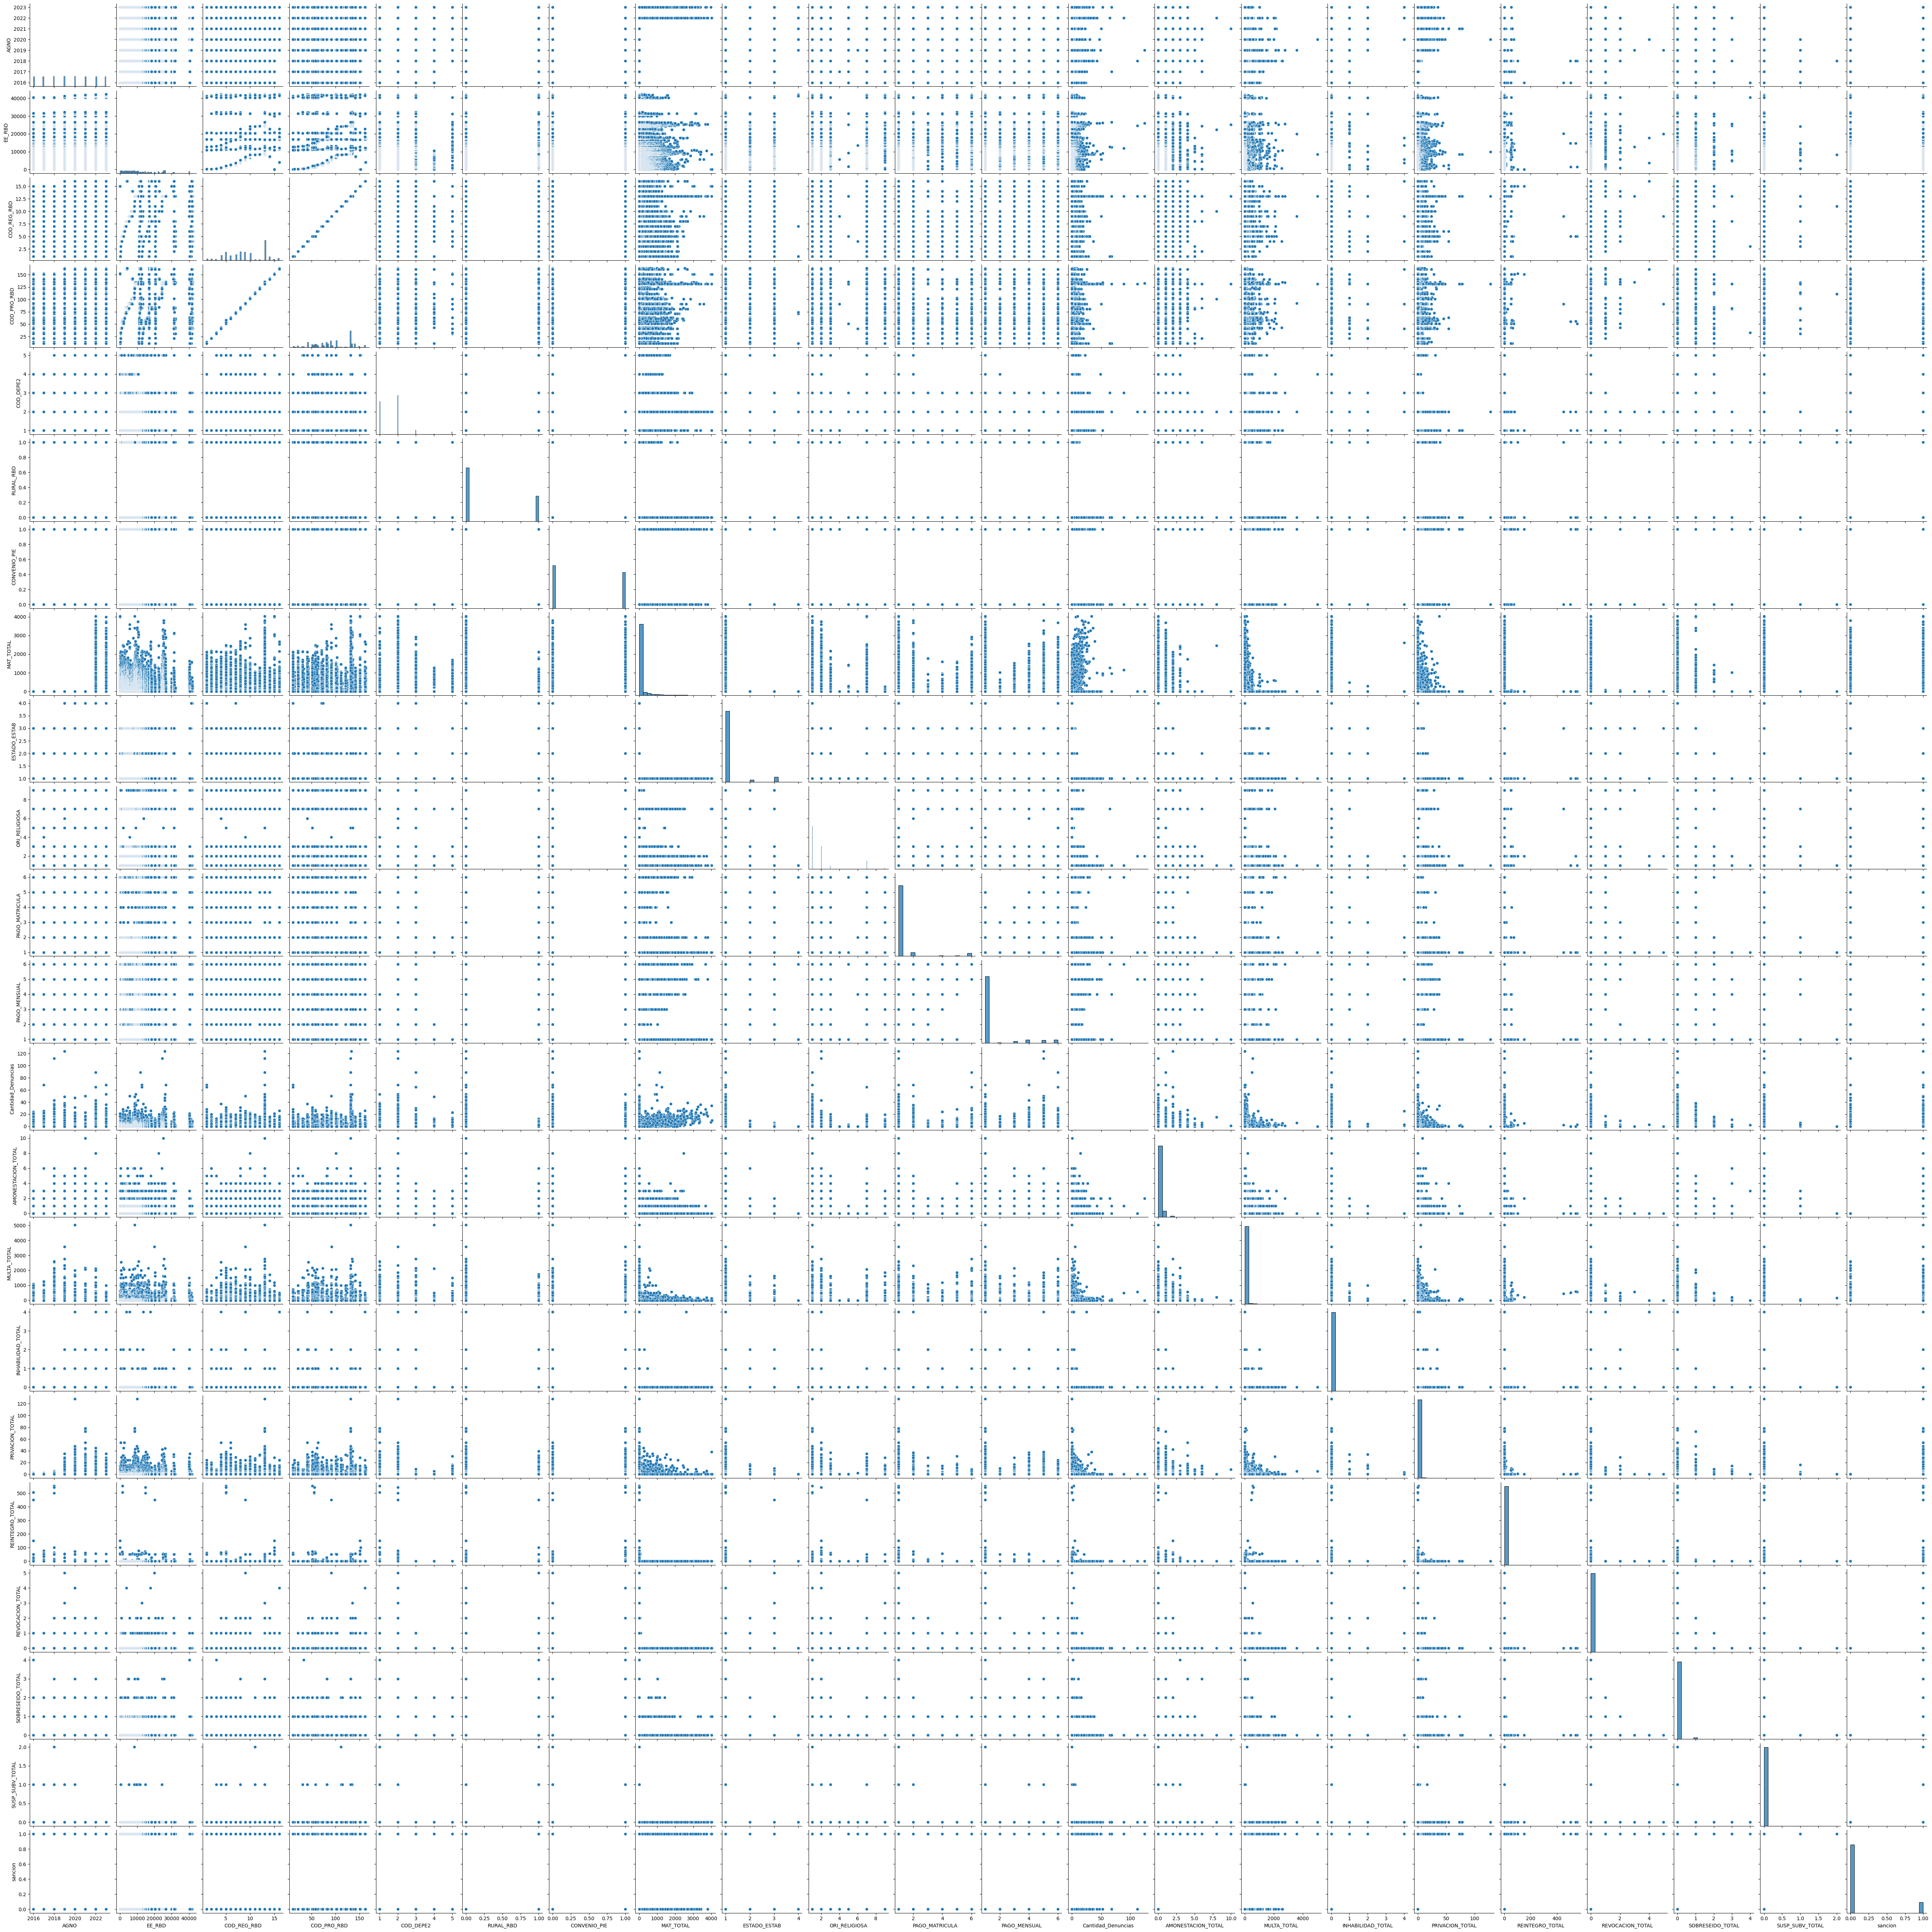

In [ ]:
#correlacion
import seaborn as sns
import matplotlib.pyplot as plt
Data_numbers = data.select_dtypes(include=['number'])



correlation_matrix = Data_numbers.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

sns.pairplot(data)
plt.show()

Estandarizacion de datos entre 0 y 1, normalizacion de atributos correspondientes.

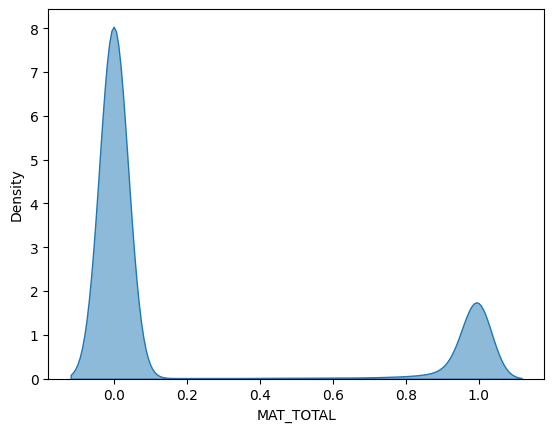

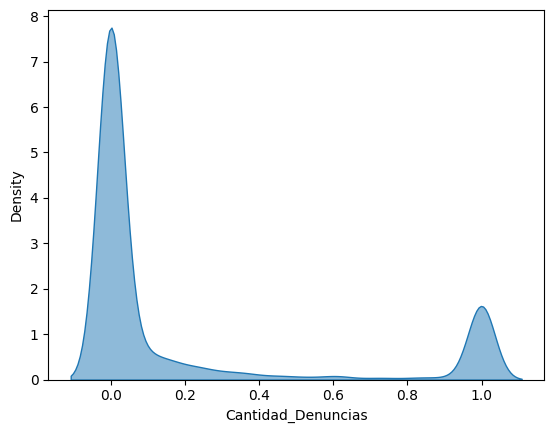

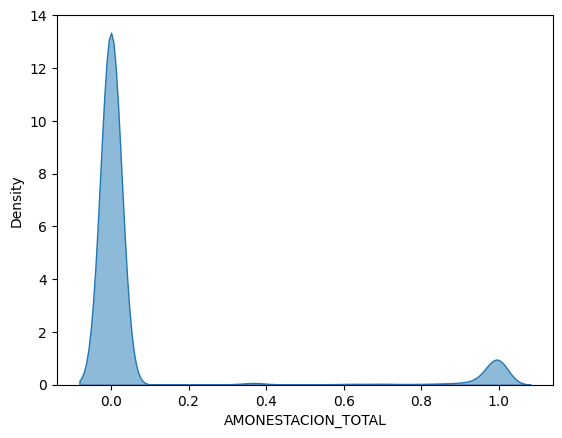

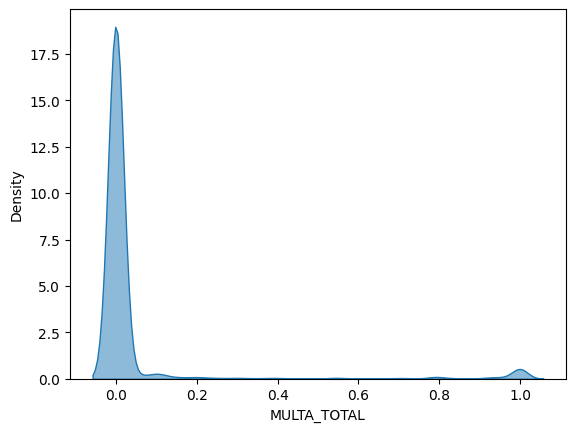

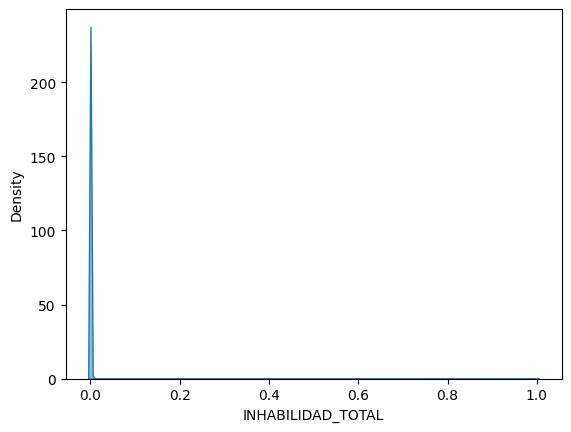

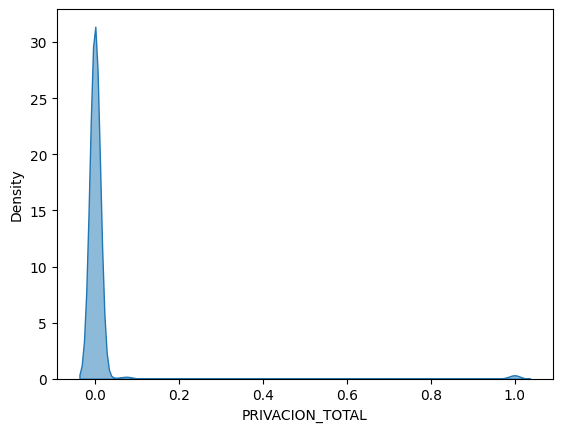

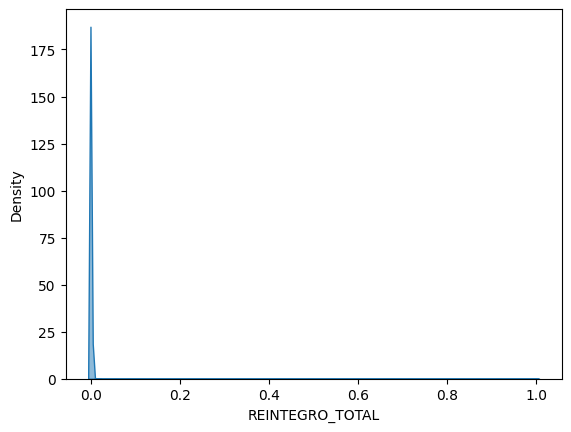

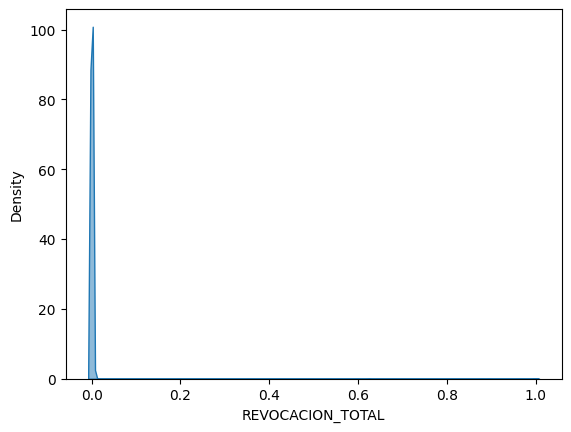

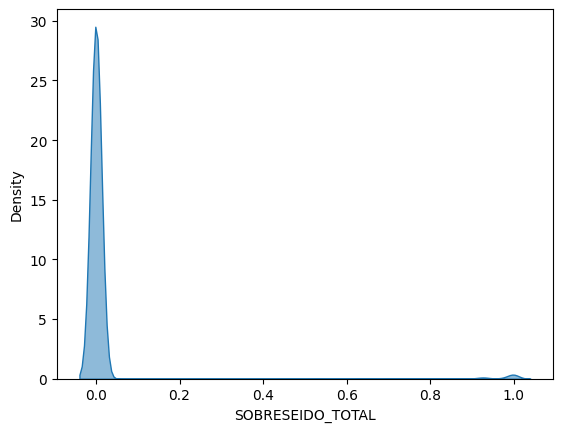

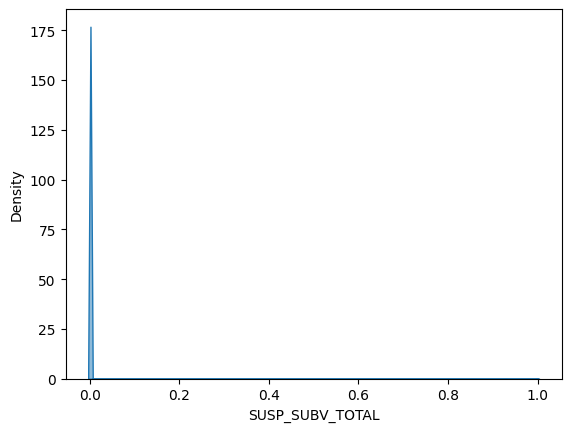

In [ ]:
#Normalizacion y estandarizacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer,MinMaxScaler


atributos_procesar = ['MAT_TOTAL', 'Cantidad_Denuncias', 'AMONESTACION_TOTAL', 'MULTA_TOTAL',
                           'INHABILIDAD_TOTAL', 'PRIVACION_TOTAL', 'REINTEGRO_TOTAL', 'REVOCACION_TOTAL',
                           'SOBRESEIDO_TOTAL', 'SUSP_SUBV_TOTAL']  # Lista de columnas para transformar

df_selec = data[atributos_procesar].copy()


scaler_minmax = MinMaxScaler()
df_standar = pd.DataFrame(scaler_minmax.fit_transform(df_selec), columns=atributos_procesar)

scaler_normalizer = Normalizer()
df_normalizar = pd.DataFrame(scaler_normalizer.fit_transform(df_standar), columns=atributos_procesar)

for column in atributos_procesar:
    sns.kdeplot(data=df_normalizar, x=column, fill=True, alpha=0.5)
    plt.show()

db=data.copy()
db[atributos_procesar] = df_normalizar

Media previa agrupacion.

In [ ]:
#Media real de denuncias
print(db['Cantidad_Denuncias'].mean())


0.19116578966749048


Desplazamiento sanciones, para observar la repercusion de las sanciones en años anteriores en el actual.

In [ ]:
#Datos 'sancion' un año hacia adelante para cada entidad
db['sancion'] = db.groupby('EE_RBD')['sancion'].shift(1)

db = db.dropna(subset=['sancion'])

print(db.head())

       AGNO  EE_RBD                              NOM_RBD  COD_REG_RBD  \
16659  2022       1              LICEO POLITECNICO ARICA           15   
16660  2022       2            PARVULARIO LAS ESPIGUITAS           15   
16661  2022       3  ESC. PEDRO VICENTE GUTIERREZ TORRES           15   
16662  2022       4            LICEO OCTAVIO PALMA PEREZ           15   
16663  2022       5             JOVINA NARANJO FERNANDEZ           15   

       COD_PRO_RBD NOM_COM_RBD NOM_DEPROV_RBD  COD_DEPE2  RURAL_RBD  \
16659          151       ARICA          ARICA          5          0   
16660          151       ARICA          ARICA          5          0   
16661          151       ARICA          ARICA          5          1   
16662          151       ARICA          ARICA          5          0   
16663          151       ARICA          ARICA          5          0   

       CONVENIO_PIE  ...  EE_COD_DEPE  AMONESTACION_TOTAL  MULTA_TOTAL  \
16659             1  ...          NaN                 0.0   

Se calcula el puntaje de propencion de sanciones por escuela en cada año, esto se expone en un grafico de densidad de propension de sanciones diferenciando por si se exponen a sanciones o no. Luego se agrupan similarmente al grafico por propencion y se emparehjan los grupos en puntajes expuestos y no expuestos.
Finalmente se calcula la diferencia de en las denuncias entre los grupos con igual propension de sanciones y se calcula el ATE efecto promedio del tratamiento, osea como afecta la exposicion de sancion en los colegios al numero de denuncias,

<ipython-input-14-cdbd2a77198f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Propensity_Score'] = logit.predict_proba(X)[:, 1]  # Probabilidad de recibir el tratamiento
<ipython-input-14-cdbd2a77198f>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dff.loc[dff[variable_tratamiento] == 1, 'Propensity_Score'], label='Tratados', shade=True)
<ipython-input-14-cdbd2a77198f>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dff.loc[dff[variable_tratamiento] == 0, 'Propensity_Score'], label='No Tra

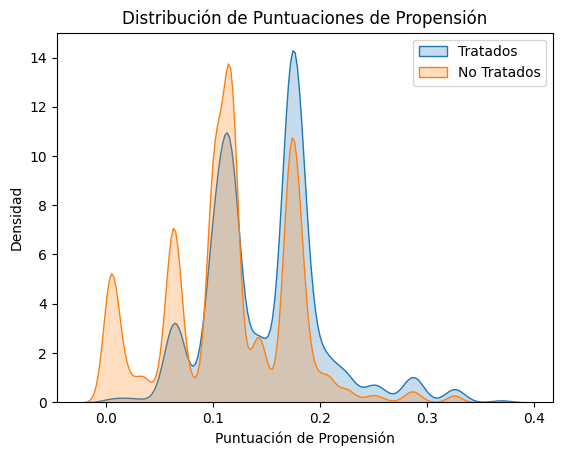

Efecto Promedio del Tratamiento (ATE) sobre la Cantidad de Denuncias: 0.22868034525586906


In [ ]:
#PSM Y ATE
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt


variable_tratamiento = 'sancion'
resultado = 'Cantidad_Denuncias'
covariables = ['RURAL_RBD', 'COD_DEPE2', 'CONVENIO_PIE', 'MAT_TOTAL', 'PAGO_MATRICULA',
               'PAGO_MENSUAL', 'ESTADO_ESTAB']

dff = db
dff = db.dropna(subset=covariables + [variable_tratamiento, resultado])

X = dff[covariables]
y = dff[variable_tratamiento]

#Regrescion logaritmica para la relacion entre exposure y covariables
logit = LogisticRegression()
logit.fit(X, y)
dff['Propensity_Score'] = logit.predict_proba(X)[:, 1]  # Probabilidad de recibir sancion

sns.kdeplot(dff.loc[dff[variable_tratamiento] == 1, 'Propensity_Score'], label='Tratados', shade=True)
sns.kdeplot(dff.loc[dff[variable_tratamiento] == 0, 'Propensity_Score'], label='No Tratados', shade=True)
plt.title("Distribución de Puntuaciones de Propensión")
plt.xlabel("Puntuación de Propensión")
plt.ylabel("Densidad")
plt.legend()
plt.show()

tratado = dff[dff[variable_tratamiento] == 1]
no_tratado = dff[dff[variable_tratamiento] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(no_tratado[['Propensity_Score']])

distancias, indices = nn.kneighbors(tratado[['Propensity_Score']])
parejas = no_tratado.iloc[indices.flatten()]

emparejado = pd.concat([tratado.reset_index(), parejas.reset_index()], axis=1, ignore_index=True)



denuncias_parejas = parejas['Cantidad_Denuncias'].reset_index(drop=True)
denuncias_tratados = tratado['Cantidad_Denuncias'].reset_index(drop=True)

ATE = (denuncias_tratados - denuncias_parejas).mean()
print(f"Efecto Promedio del Tratamiento (ATE) sobre la Cantidad de Denuncias: {ATE}")


## Conclusión
Los hallazgos muestran que las sanciones no influyen en el numero de denuncias futuras.

Con base en los hallazgos presentados, creemos necesario fortalecer las políticas de intervención en escuelas con alto riesgo, ya que los resultados muestran que ciertas características institucionales y geográficas predicen un mayor número de denuncias. Esto sugiere que se deben priorizar las intervenciones en los establecimientos con estas características.

Además dados los resultados negativos, con respecto a la eficiencia de las sanciones para reducir las denuncias, encontramos necesario el rediseño y la implementación de nuevas políticas sancionatorias, para hacerlas más efectivas. Evaluando activamente el cambio en los ambientes escolares una vez implementadas, en vez de sólo imponer las penalidades.

Dado que el modelo de Propensity Score Matching indica un incremento de denuncias en los colegios sancionados, se podría implementar un sistema de apoyo y monitoreo para estos colegios, orientado a identificar y solucionar las causas subyacentes de las denuncias, en donde a los equipos escolares se les capacite en prácticas educativas y administrativas preventivas. Esto podría incluir la creación de protocolos internos de resolución de conflictos y la mejora del ambiente educativo, especialmente en aquellas instituciones identificadas como de mayor riesgo.

## Bibliografia
1. Mineduc. (n.d.). Ley de inclusión escolar. Recuperado de https://www.comunidadescolar.cl/ley-de-inclusion-escolar-2/#:~:text=La%20ley%20de%20Inclusi%C3%B3n%20Escolar,que%20reciben%20aportes%20del%20estado.
2. Supereduc. (2023). Denuncias de Datos Abiertos. https://supereduca-my.sharepoint.com/personal/datos_abiertos_supereduc_cl/_layouts/15/onedrive.aspx?ga=1&LOF=1&id=%2Fpersonal%2Fdatos%5Fabiertos%5Fsupereduc%5Fcl%2FDocuments%2FBBDD%20Datos%20Abiertos%20SIE%2FDenuncias%2FDEN%5FER%2FER%5FDENUNCIAS%5FPUBL%2Epdf&parent=%2Fpersonal%2Fdatos%5Fabiertos%5Fsupereduc%5Fcl%2FDocuments%2FBBDD%20Datos%20Abiertos%20SIE%2FDenuncias%2FDEN%5FER
3. Directorio de Establecimientos Educacionales – Datos abiertos. (s. f.). https://datosabiertos.mineduc.cl/directorio-de-establecimientos-educacionales/
4. Machine Learninr Yearning: Technical Strategy for AI Engineers, In the Era of Deep Learning. (s. f.). https://wordpress.deeplearning.ai/wp-content/uploads/2022/03/andrew-ng-machine-learning-yearning.pdf
5. Shafi, A. (2024, 29 febrero). Clasificación de bosques aleatorios con Scikit-Learn. Datacamp. https://www.datacamp.com/es/tutorial/random-forests-classifier-python
6. Sobredispersion abordar la sobredispersion una inmersion profunda en la regresion binomial negativa. (2024, 24 junio). FasterCapital. https://fastercapital.com/es/contenido/Sobredispersion--abordar-la-sobredispersion--una-inmersion-profunda-en-la-regresion-binomial-negativa.html
7. T-Test, Chi-Square, ANOVA, Regression, Correlation. . . (s. f.). https://datatab.es/tutorial/point-biserial-correlation